#### Y and KPY organoid co-culture scRNA-Seq analysis

In [1]:
import os
import glob
import scanpy as sc
import scanpy.external as sce
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
import seaborn as sb
from seaborn import despine
from seaborn import axes_style
import magic # imputation tool; van Dijk et al 2018 # 
from matplotlib.pyplot import suptitle
import matplotlib.colors
from matplotlib.ticker import FormatStrFormatter
from matplotlib.patches import Patch # for clustermap legends
import time

sc.settings.verbosity = 0  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80)

/home/alm72/.conda/envs/KPYtimecourse/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


#### Draw fa2 graph using the subset organoid data

In [3]:
at2_results_file = 'path/to/h5ad'
at2Cells = sc.read(at2_results_file) 

Ycontrol2 = at2Cells[at2Cells.obs['leiden0_2'].isin(['2','9','10','7','0','5'])]
sc.tl.draw_graph(Ycontrol2)

Trying to set attribute `.uns` of view, copying.


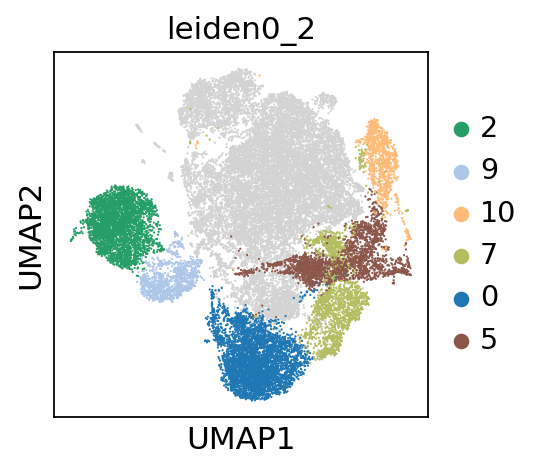

In [5]:
rcParams['figure.figsize']=3,3
rcParams['figure.facecolor']='white'
sc.pl.umap(at2Cells, color='leiden0_2', groups=['2','9','10','7','0','5'])

# subset control organoids and compute forced atlas 2 graph
Ycontrol2 = at2Cells[at2Cells.obs['leiden0_2'].isin(['2','9','10','7','0','5'])]
sc.tl.draw_graph(Ycontrol2)

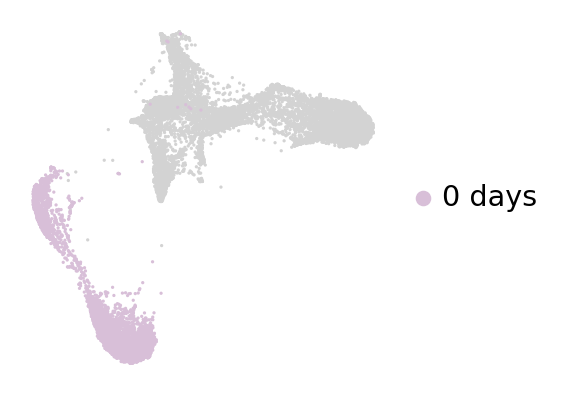

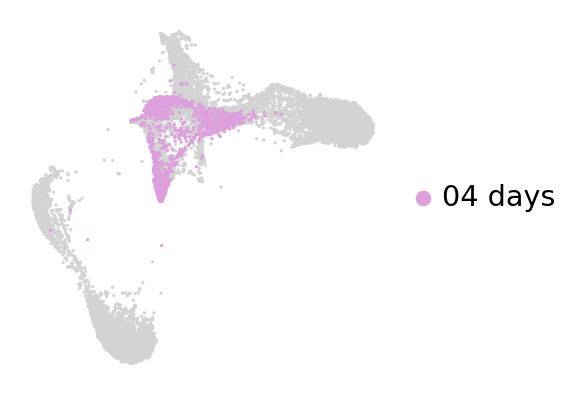

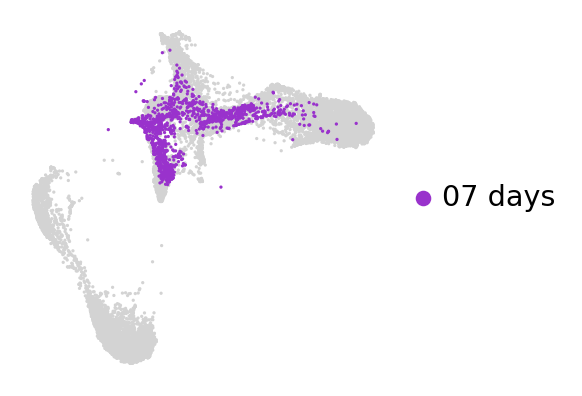

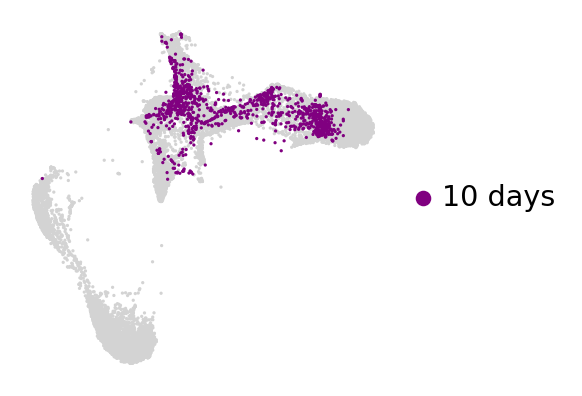

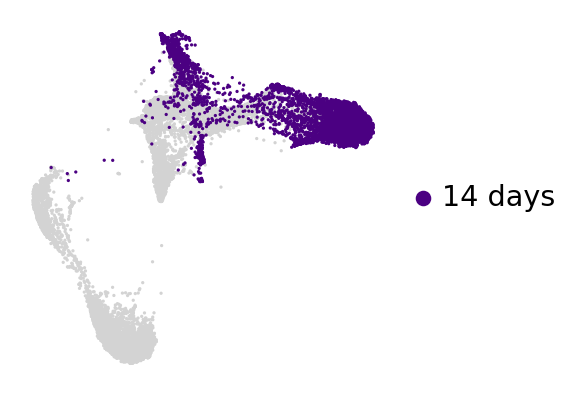

In [13]:
palette = ['thistle','plum','darkorchid','purple','indigo']
lst = sorted(list(set(Ycontrol2.obs['time point'])))

for i, j in zip(lst, palette):
    rcParams['figure.facecolor']='white'
    rcParams['figure.figsize']=3,3
    sc.pl.draw_graph(Ycontrol2, color='time point', groups=[i], palette=[j], frameon=False, show=False)
    plt.title('')

#### Find clusters in the Y control data

In [5]:
# Run leiden algorithm at different resolutions
sc.tl.leiden(Ycontrol2, resolution=0.05, key_added='leiden0_05')
sc.tl.leiden(Ycontrol2, resolution=0.1, key_added='leiden0_1')
sc.tl.leiden(Ycontrol2, resolution=0.2, key_added='leiden0_2')
sc.tl.leiden(Ycontrol2, resolution=0.4, key_added='leiden0_4')

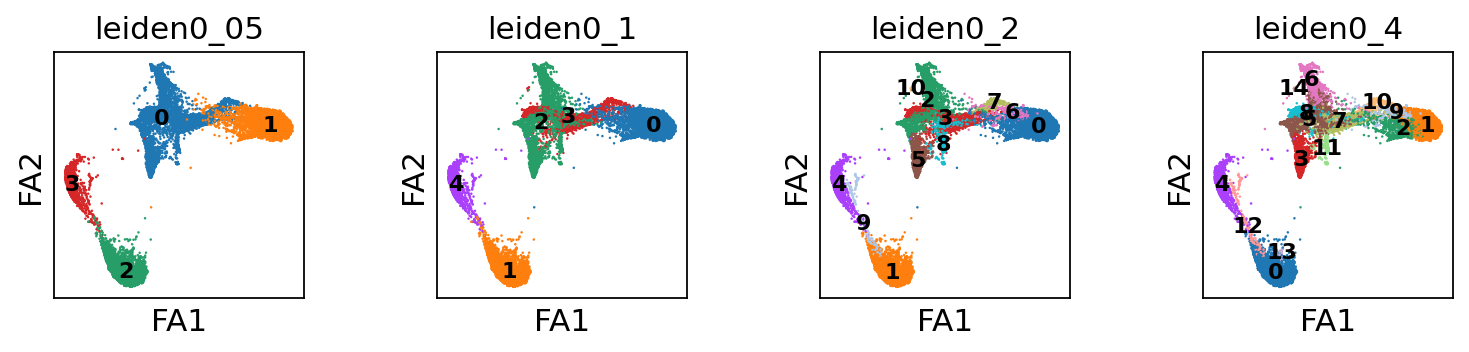

In [7]:
leiden_clusts=['leiden0_05','leiden0_1','leiden0_2','leiden0_4']

rcParams["figure.facecolor"]='white'
rcParams['figure.figsize'] = 2,2
sc.pl.draw_graph(Ycontrol2, color=leiden_clusts, hspace=0.5, legend_fontsize=10,legend_loc='on data', size=5, 
frameon=True, show=False)

#### Differential expression for all leiden resolutions

In [ ]:
ngenes = 3000
method = 'wilcoxon'
lst=['leiden0_05','leiden0_1','leiden0_2','leiden0_4',]
anndata = Ycontrol2

for resolution in lst:
    print(f'Performing DE analysis for resolution={resolution}...')
    sc.tl.rank_genes_groups(anndata, groupby=resolution, key_added=f'rank_genes_{resolution}',
    method = method, n_genes=ngenes)

    # save data to adata_subset.uns
    result = anndata.uns[f'rank_genes_{resolution}']
    groups = result['names'].dtype.names

de_data = pd.DataFrame({group + '_' + key[:1]: result[key][group] for group in groups for key in ['names', 'pvals_adj','logfoldchanges']})

In [31]:
# Save DE results
result = Ycontrol2.uns['rank_genes_leiden0_4']
groups = result['names'].dtype.names
de_data = pd.DataFrame({group + '_' + key[:1]: result[key][group] for group in groups for key in ['names', 'pvals_adj','logfoldchanges']})

de_data.to_excel("/n/data2/bch/hemonc/ckim/AARON/20190715_KPY_timecourse/data_analysis/organoids/Differential Expression Results/control_orgs_all_DE.xlsx", sheet_name='Sheet1')

Text(0, 0.5, '')

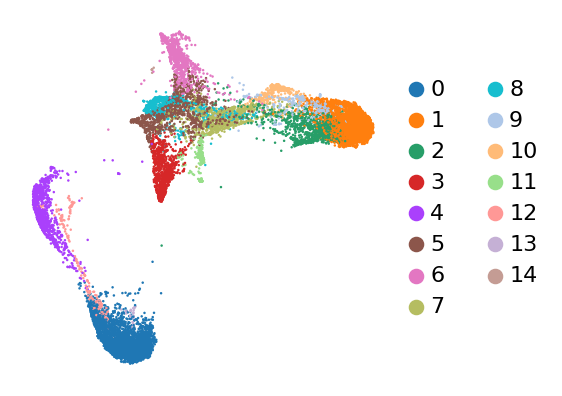

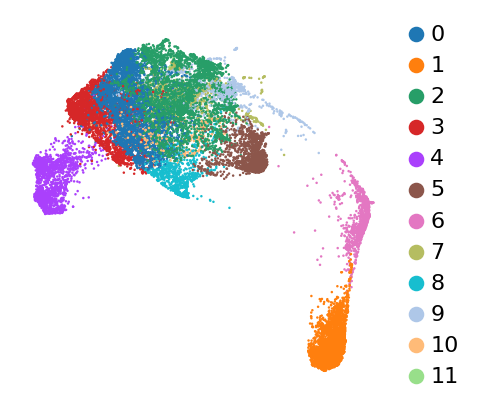

In [9]:
rcParams["figure.facecolor"]='white'
rcParams['figure.figsize'] = 3,3
sc.pl.draw_graph(Ycontrol2, color='leiden0_4', hspace=0.5, legend_fontsize=10,legend_loc='right margin', size=5, frameon=False, show=False)
plt.title('')
plt.xlabel('')
plt.ylabel('')

rcParams["figure.facecolor"]='white'
rcParams['figure.figsize'] = 3,3
sc.pl.draw_graph(KPY2, color='leiden0_2', hspace=0.5, legend_fontsize=10,legend_loc='right margin', size=5, 
frameon=False, show=False)
plt.title('')
plt.xlabel('')
plt.ylabel('')

In [11]:
print(len(Ycontrol2.obs.index))
print(len(KPY2.obs.index))

13981
20340


#### Create fa2 graph using subset KPY data

In [39]:
KPY2 = at2Cells[at2Cells.obs['leiden0_2'].isin(['2','9','8','4','1','11','12','3','6'])]
sc.tl.draw_graph(KPY2)

Trying to set attribute `.uns` of view, copying.


In [5]:
print(len(KPY2.obs.index))

20340


#### Save the KPY2 subset data

In [41]:
KPY2_at2_results_file = '/n/data2/bch/hemonc/ckim/AARON/20190715_KPY_timecourse/data_analysis/saved_files/at2_organoids_KPY.h5ad'
KPY2.write(KPY2_at2_results_file)

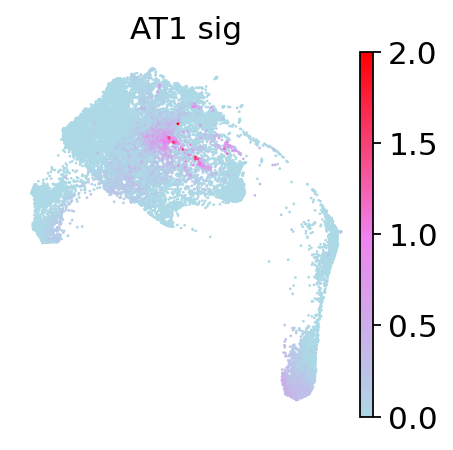

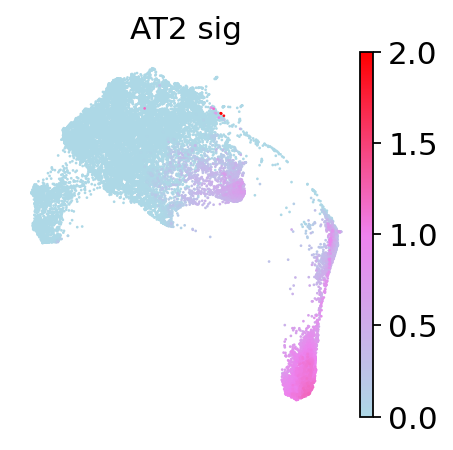

In [8]:
# make expression range comparable to control
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['lightblue','violet','red'])

rcParams['figure.facecolor']='white'
rcParams['figure.figsize']=3,3
sc.pl.draw_graph(KPY2, color='AT1 sig', vmin=0, vmax=2, color_map=cmap, use_raw=False, frameon=False)
sc.pl.draw_graph(KPY2, color='AT2 sig', vmin=0, vmax=2, color_map=cmap, use_raw=False, frameon=False)

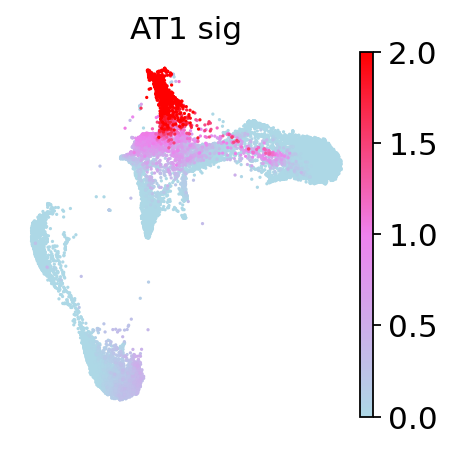

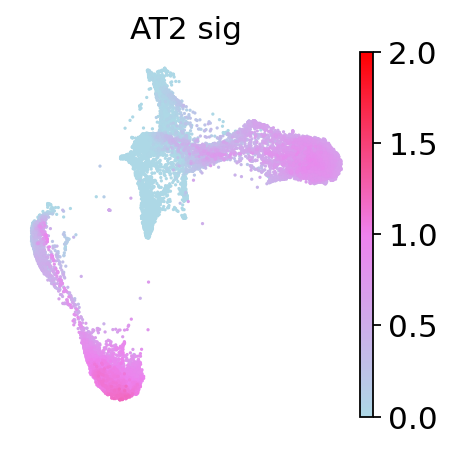

In [7]:
# make expression range comparable to control
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['lightblue','violet','red'])

rcParams['figure.facecolor']='white'
rcParams['figure.figsize']=3,3
sc.pl.draw_graph(Ycontrol2, color='AT1 sig', vmin=0, vmax=2, color_map=cmap, use_raw=False, frameon=False)
sc.pl.draw_graph(Ycontrol2, color='AT2 sig', vmin=0, vmax=2, color_map=cmap, use_raw=False, frameon=False)

#### KPY specific clusters

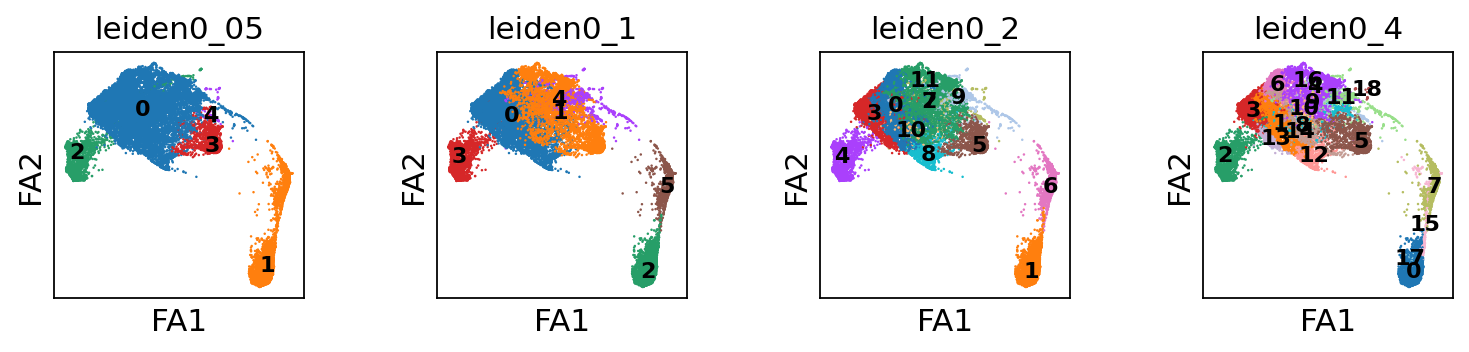

In [42]:
# Run leiden algorithm at different resolutions
sc.tl.leiden(KPY2, resolution=0.05, key_added='leiden0_05')
sc.tl.leiden(KPY2, resolution=0.1, key_added='leiden0_1')
sc.tl.leiden(KPY2, resolution=0.2, key_added='leiden0_2')
sc.tl.leiden(KPY2, resolution=0.4, key_added='leiden0_4')

leiden_clusts=['leiden0_05','leiden0_1','leiden0_2','leiden0_4']

rcParams["figure.facecolor"]='white'
rcParams['figure.figsize'] = 2,2
sc.pl.draw_graph(KPY2, color=leiden_clusts, hspace=0.5, legend_fontsize=10,legend_loc='on data', size=5, 
frameon=True, show=False)

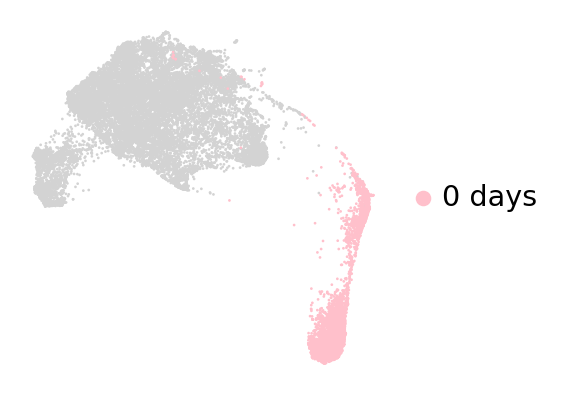

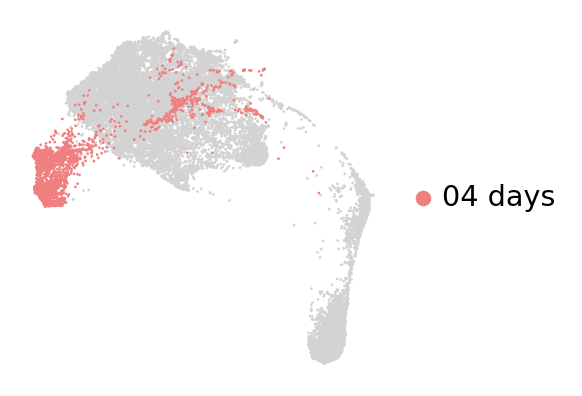

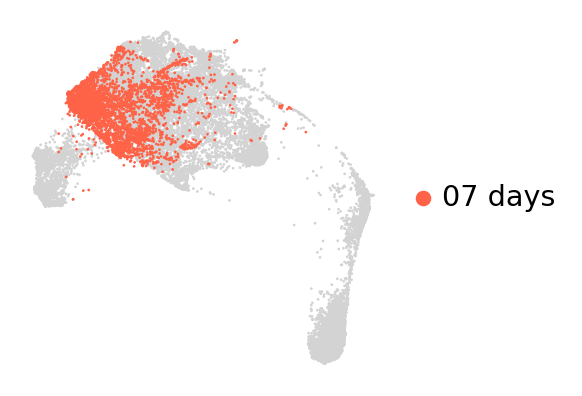

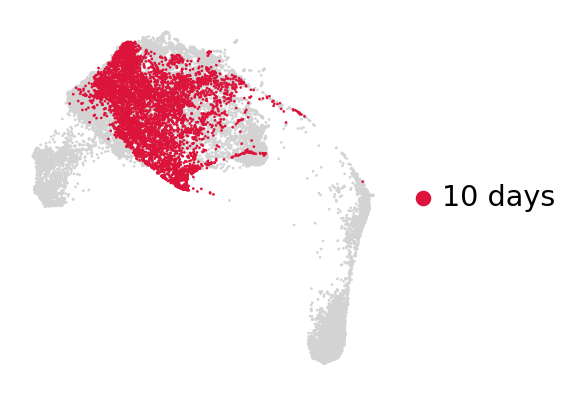

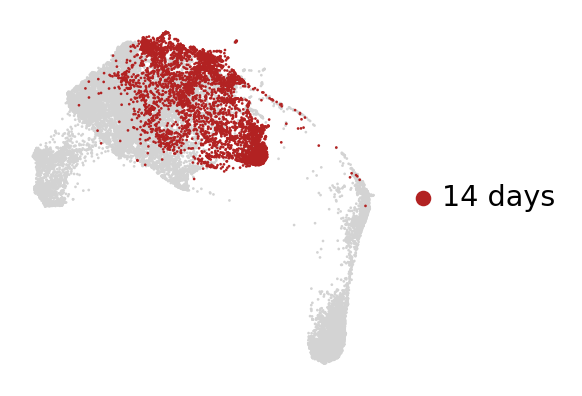

In [14]:
palette = ['pink','lightcoral','tomato','crimson','firebrick']
lst = sorted(list(set(KPY2.obs['time point'])))

for i, j in zip(lst, palette):
    rcParams['figure.facecolor']='white'
    rcParams['figure.figsize']=3,3
    sc.pl.draw_graph(KPY2, color='time point', groups=[i], palette=[j], frameon=False, show=False)
    plt.title('')

### Remove the freshly sorted cells from FA2 for the manuscript

In [95]:
# Remove freshly sorted cells form the subset organoid data
Y_nofresh = Ycontrol2[Ycontrol2.obs['time point'].isin(['04 days','07 days', '10 days','14 days'])]
KPY_nofresh = KPY2[KPY2.obs['time point'].isin(['04 days','07 days','10 days','14 days'])]

# Generate z-normalized expression values
Y_nofresh_scaled = sc.pp.scale(Y_nofresh, copy=True)
KPY_nofresh_scaled = sc.pp.scale(KPY_nofresh, copy=True)

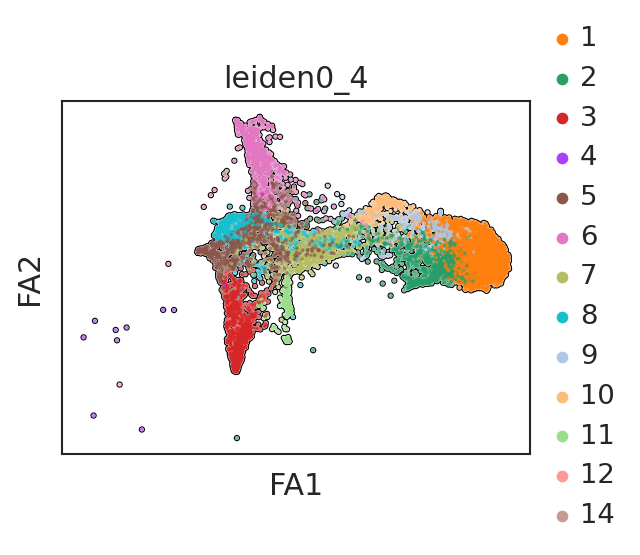

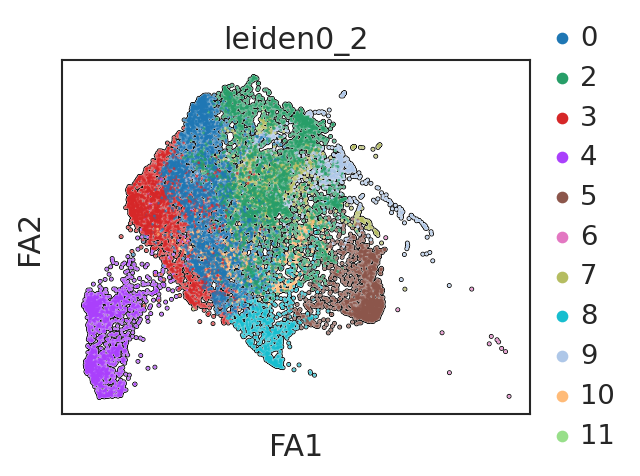

In [97]:
# Plot Leiden clusters on each FA2 plot
rcParams['figure.facecolor']='white'
rcParams['figure.figsize']=4,3
rcParams['figure.dpi']=150
sc.pl.draw_graph(Y_nofresh_scaled, color=['leiden0_4'], wspace=0.5, add_outline=True)
sc.pl.draw_graph(KPY_nofresh_scaled, color=['leiden0_2'], wspace=0.5, add_outline=True)

### Plot the expression of AT1 and AT2 marker genes in both genotypes

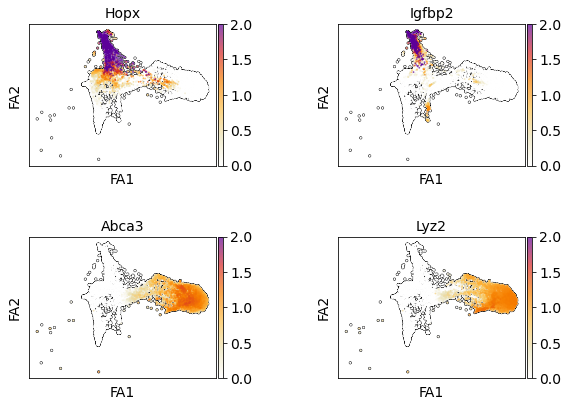

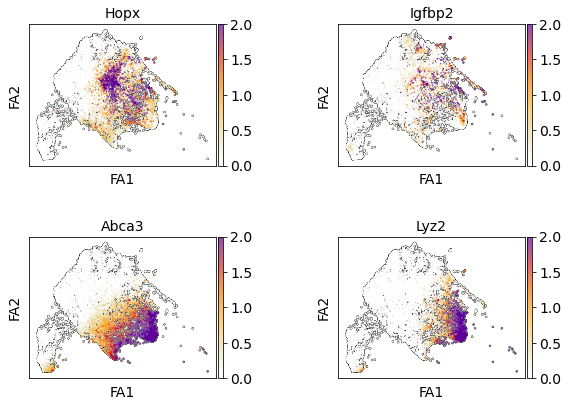

In [9]:
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", np.flip(['#5c0099', '#d62828', '#f77f00', '#fcbf49', '#eae2b7','white']))

rcParams['figure.facecolor']='white'
rcParams['figure.figsize']=3,3
sc.pl.draw_graph(Y_nofresh_scaled, color=['Hopx','Igfbp2', 'Abca3','Lyz2'], vmin=0, vmax=2, color_map=cmap, use_raw=False, 
                 wspace=0.5, hspace=0.5, add_outline=True, ncols=2)

sc.pl.draw_graph(KPY_nofresh_scaled, color=['Hopx','Igfbp2', 'Abca3','Lyz2'], vmin=0, vmax=2, color_map=cmap, use_raw=False, 
                 wspace=0.5, hspace=0.5, add_outline=True, ncols=2)

### YAP/TAZ genes

In [ ]:
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", np.flip(['#5c0099', '#d62828', '#f77f00', '#fcbf49', '#eae2b7','white']))

rcParams['figure.facecolor']='white'
rcParams['figure.figsize']=3,3
rcParams['figure.dpi']=150

# For supp figure 2
sc.pl.draw_graph(Y_nofresh_scaled, color=['Tead1','Wwtr1'], vmin=0, vmax=2, color_map=cmap, use_raw=False, wspace=0.5, add_outline=True)
sc.pl.draw_graph(KPY_nofresh_scaled, color=['Tead1','Wwtr1'], vmin=0, vmax=2, color_map=cmap, use_raw=False, wspace=0.5, add_outline=True)

# Wwtr1 = Taz

#### Plot time points in Y and KPY
- Visualize in a 2x2 grid (4 time points total)

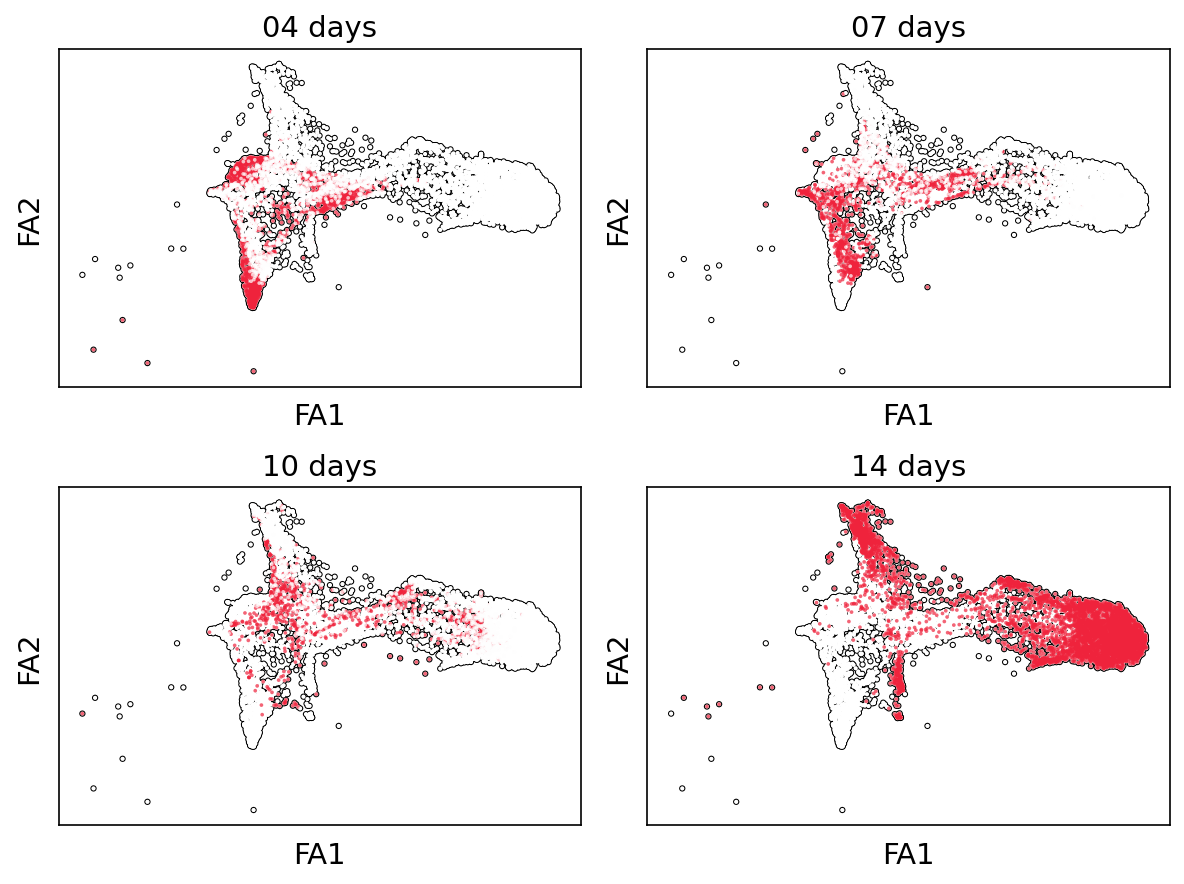

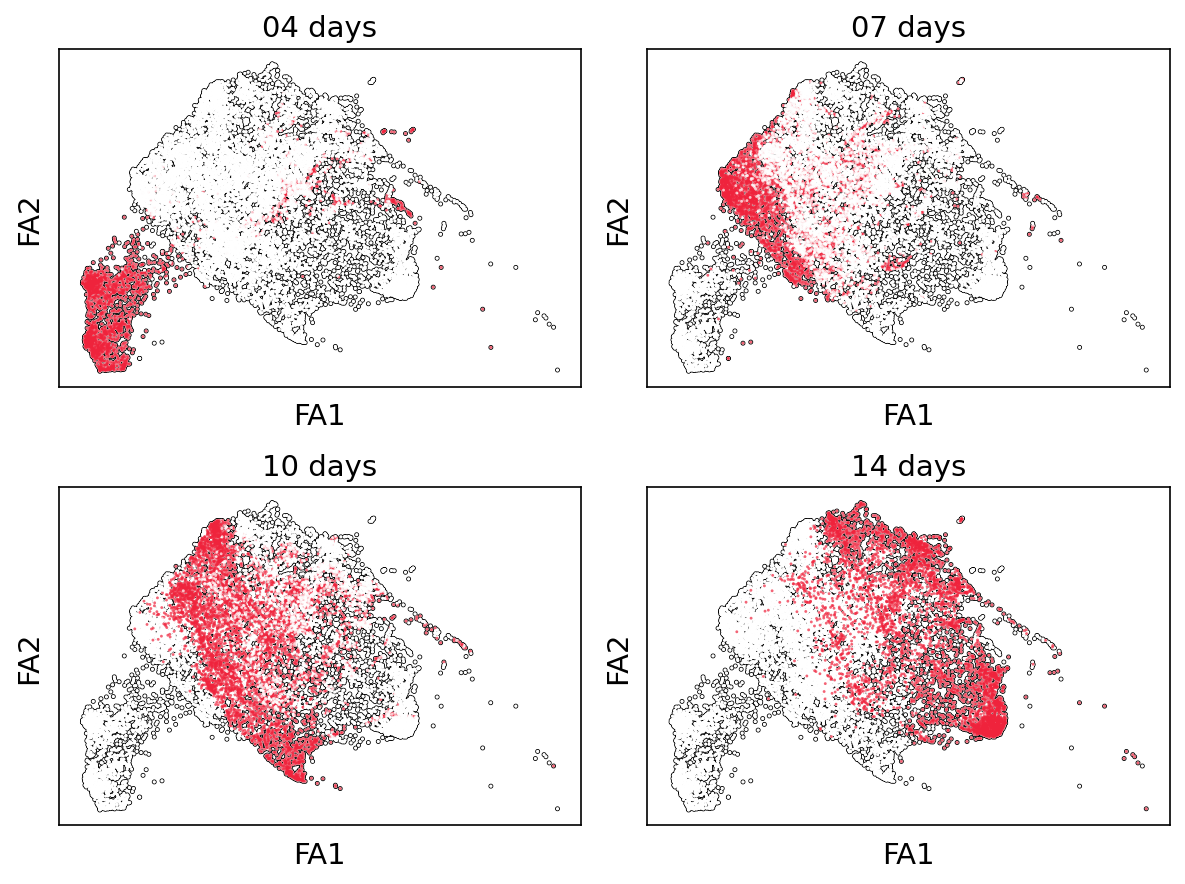

In [17]:
# Define a color palette with two colors
p3 = ['#ef233c', 'white']

# Define a function that takes adata and a color palette as inputs and plots separate time points
def plot_time_points(adata, palette):
    
    # import packages
    import matplotlib.pyplot as plt

    # Get the unique time points from the 'time point' column in adata's observations
    unique_time_points = np.unique(adata.obs['time point'])

    # Define the number of rows and columns in the grid
    n_rows = 2
    n_cols = 2

    # If the number of unique time points exceeds the grid size, raise a ValueError
    if len(unique_time_points) > n_rows * n_cols:
        raise ValueError("The number of unique time points exceeds the grid size. Please increase the grid size to accommodate all time points.")

    # Create a figure with subplots, using the number of rows and columns specified above
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(8, 6), dpi=150)

    # Flatten the array of subplots
    axs = axs.ravel()

    # For each unique time point, create a mask to select the cells corresponding to that time point
    # Set the custom_color to the time_point value for those cells, and 'white' for all other cells
    # Then plot the graph using scanpy's draw_graph function, with the custom color scheme and the selected subplot
    # Set the title of the subplot to the time_point value
    for idx, time_point in enumerate(unique_time_points):
        mask = adata.obs['time point'] == time_point
        custom_color = np.where(mask, time_point, 'white')
        adata.obs['custom_color'] = custom_color
        ax = sc.pl.draw_graph(adata, color='custom_color', vmin=-2, vmax=2, color_map='bwr', use_raw=False, wspace=0.5, add_outline=True, palette=palette, legend_loc=None, ax=axs[idx], show=False)
        ax.set_title(time_point)

    # Remove any unused subplots
    for i in range(len(unique_time_points), n_rows * n_cols):
        axs[i].set_visible(False)

    # Adjust spacing between subplots and display the plot
    plt.tight_layout()
    plt.show()

# Call the plot_time_points function twice, once for Y_nofresh_scaled and once for KPY_nofresh_scaled, using the p3 palette
plot_time_points(Y_nofresh_scaled, p3)
plot_time_points(KPY_nofresh_scaled, p3)


### Fate probability analysis using Palantir - https://github.com/dpeerlab/Palantir

start state cell: AAACCCATCTTGTTAC-1-AD04
at2 state cell: AAAGGTAGTAGAGATT-1-AD08
at1 state cell: AAAGGTATCCATTTAC-1-AD16


(<Figure size 288x288 with 1 Axes>, <AxesSubplot:>)

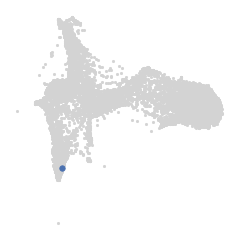

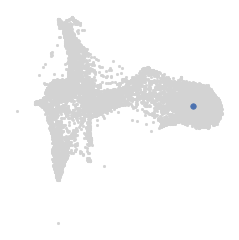

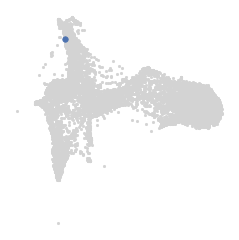

In [39]:
import palantir
adata = Y_nofresh_scaled.copy()

# define scanpy embedding for palantir visualization
fa2 = pd.DataFrame(adata.obsm['X_draw_graph_fa'], index=adata.obs_names)

# Find representative cells for each state
start_cell = adata.obs.index[adata.obs["leiden0_4"] == "3"][0]
at2_state = adata.obs.index[adata.obs["leiden0_4"] == "1"][0]
at1_state = adata.obs.index[adata.obs["leiden0_4"] == "6"][150]
print("start state cell:", start_cell)
print("at2 state cell:", at2_state)
print("at1 state cell:", at1_state)

# plot
palantir.plot.highlight_cells_on_tsne(fa2, start_cell)
palantir.plot.highlight_cells_on_tsne(fa2, at2_state)
palantir.plot.highlight_cells_on_tsne(fa2, at1_state)

In [40]:
adata = Y_nofresh_scaled.copy()

# Step 4: Prepare the data for Palantir
clusters = adata.obs["leiden0_4"]
start_cell = adata.obs.index[adata.obs["leiden0_4"] == "3"][0]
terminal_states = pd.Series(['AT2 Fate', 'AT1 Fate'], index=[at2_state, at1_state])

# Extract the expression matrix and convert it to a pandas DataFrame
expr_matrix = pd.DataFrame(adata.X, index=adata.obs.index, columns=adata.var.index)

# Step 5: Run Palantir
# Compute diffusion maps
dm_res = palantir.utils.run_diffusion_maps(expr_matrix, n_components=5)
ms_data = palantir.utils.determine_multiscale_space(dm_res, n_eigs=3) # n_egs MUST be defined

# Run Palantir
pr_res = palantir.core.run_palantir(ms_data, start_cell, num_waypoints=500, knn=50, terminal_states=terminal_states.index)

# Rename the index with the biologically relevant names
pr_res.branch_probs.columns = terminal_states[pr_res.branch_probs.columns]

Determing nearest neighbor graph...


/home/alm72/.conda/envs/KPYtimecourse/lib/python3.8/site-packages/numba/typed_passes.py:292: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../../../../../home/alm72/.conda/envs/KPYtimecourse/lib/python3.8/site-packages/umap/rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^

  warnings.warn(errors.NumbaPerformanceWarning(msg,
/home/alm72/.conda/envs/KPYtimecourse/lib/python3.8/site-packages/umap/nndescent.py:91: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/

Sampling and flocking waypoints...
Time for determining waypoints: 0.008779338995615641 minutes
Determining pseudotime...
Shortest path distances using 50-nearest neighbor graph...
Time for shortest paths: 0.31573368310928346 minutes
Iteratively refining the pseudotime...
Correlation at iteration 1: 0.9999
Entropy and branch probabilities...
Markov chain construction...
Computing fundamental matrix and absorption probabilities...
Project results to all cells...


In [69]:
adata = Y_nofresh_scaled.copy()

# Step 4: Prepare the data for Palantir
clusters = adata.obs["leiden0_4"]
start_cell = adata.obs.index[adata.obs["leiden0_4"] == "3"][0]
terminal_states = pd.Series(['AT2 Fate', 'AT1 Fate'], index=[at2_state, at1_state])

# Extract the expression matrix and convert it to a pandas DataFrame
expr_matrix = pd.DataFrame(adata.X, index=adata.obs.index, columns=adata.var.index)

# Step 5: Run Palantir
# Compute diffusion maps
dm_res = palantir.utils.run_diffusion_maps(expr_matrix, n_components=5)
ms_data = palantir.utils.determine_multiscale_space(dm_res, n_eigs=3) # n_egs MUST be defined

# Run Palantir
pr_res = palantir.core.run_palantir(ms_data, start_cell, num_waypoints=500, knn=50, terminal_states=terminal_states.index)

# Rename the index with the biologically relevant names
pr_res.branch_probs.columns = terminal_states[pr_res.branch_probs.columns]

Determing nearest neighbor graph...


/home/alm72/.conda/envs/KPYtimecourse/lib/python3.8/site-packages/numba/typed_passes.py:292: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../../../../../home/alm72/.conda/envs/KPYtimecourse/lib/python3.8/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  warnings.warn(errors.NumbaPerformanceWarning(msg,


Sampling and flocking waypoints...
Time for determining waypoints: 0.0223251740137736 minutes
Determining pseudotime...
Shortest path distances using 50-nearest neighbor graph...
Time for shortest paths: 0.26556283632914224 minutes
Iteratively refining the pseudotime...
Correlation at iteration 1: 0.9999
Entropy and branch probabilities...
Markov chain construction...
Computing fundamental matrix and absorption probabilities...
Project results to all cells...


(<Figure size 288x288 with 1 Axes>, <AxesSubplot:>)

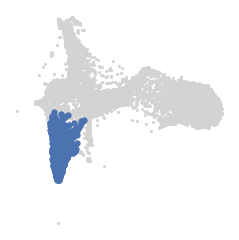

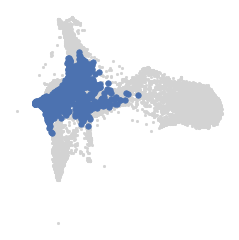

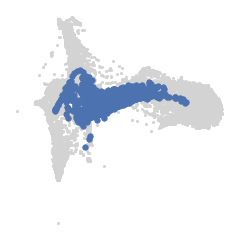

In [41]:
# Get all cell indices for the desired clusters
c3_cells = adata.obs.index[adata.obs["leiden0_4"] == "3"]
c5_cells = adata.obs.index[adata.obs["leiden0_4"] == "5"]
c7_cells = adata.obs.index[adata.obs["leiden0_4"] == "7"]

# filter pr_res.branch_probs for cells in cluster of interest
# pr_res.branch_probs = dataframe with all probabilities, produced by Palantir
filtered_c3_cells_df = pr_res.branch_probs.loc[pr_res.branch_probs.index.isin(list(c3_cells))]
filtered_c5_cells_df = pr_res.branch_probs.loc[pr_res.branch_probs.index.isin(list(c5_cells))]
filtered_c7_cells_df = pr_res.branch_probs.loc[pr_res.branch_probs.index.isin(list(c7_cells))]

# qc plots
palantir.plot.highlight_cells_on_tsne(fa2, list(filtered_c3_cells_df.index))
palantir.plot.highlight_cells_on_tsne(fa2, list(filtered_c5_cells_df.index))
palantir.plot.highlight_cells_on_tsne(fa2, list(filtered_c7_cells_df.index))

### Visualize the probabilities of C3, C5, and C7 cells end in an AT2 state

/home/alm72/.conda/envs/KPYtimecourse/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: In a future version of pandas all arguments of Categorical.replace except for the argument 'value' will be keyword-only.
  values = values.replace(values.categories.difference(groups), np.nan)
/home/alm72/.conda/envs/KPYtimecourse/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: Categorical.replace is deprecated and will be removed in a future version. Use Series.replace directly instead.
  values = values.replace(values.categories.difference(groups), np.nan)
/home/alm72/.conda/envs/KPYtimecourse/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: In a future version of pandas all arguments of Categorical.replace except for the argument 'value' will be keyword-only.
  values = values.replace(values.categories.difference(groups), np.nan)
/home/alm72/.conda/envs/KPYtimecourse/lib/python3.8/

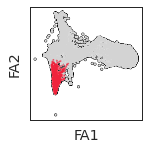

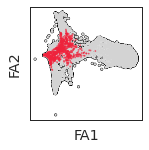

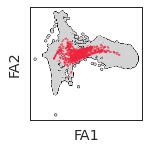

In [43]:
# branch point leiden clusters
lst = ['3','5','7']
p3 = ['#ef233c']

for i in lst:
    rcParams["figure.facecolor"]='white'
    rcParams['figure.figsize'] = 2,2
    ax = sc.pl.draw_graph(adata, color='leiden0_4', groups = i, wspace=0.5, add_outline=True, palette=p3, 
    legend_loc=None, show=False)
    plt.title('')

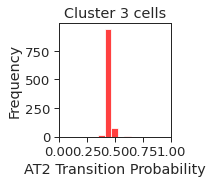

In [45]:
import seaborn as sns

# create a sample dataframe
df = filtered_c3_cells_df

# plot the histogram with different colors for each column
sns.histplot(data=df, x='AT2 Fate', color='red', kde=False, bins=5)

# set the x-axis limits and ticks
plt.xlim([0, 1])
plt.xticks([0, 0.25, 0.5, 0.75, 1])

# set the x-axis label
plt.xlabel('AT2 Transition Probability')

# set the y-axis label
plt.ylabel('Frequency')

# set the title
plt.title('Cluster 3 cells')

# show the plot
plt.show()


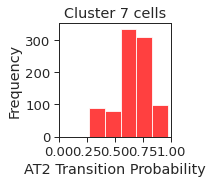

In [46]:
# create a sample dataframe
df = filtered_c7_cells_df

# plot the histogram with different colors for each column
sns.histplot(data=df, x='AT2 Fate', color='red', kde=False, bins=5)

# set the x-axis limits and ticks
plt.xlim([0, 1])
plt.xticks([0, 0.25, 0.5, 0.75, 1])

# set the x-axis label
plt.xlabel('AT2 Transition Probability')

# set the y-axis label
plt.ylabel('Frequency')

# set the title
plt.title('Cluster 7 cells')

# show the plot
plt.show()


169
590
151


(<Figure size 600x600 with 1 Axes>, <AxesSubplot:>)

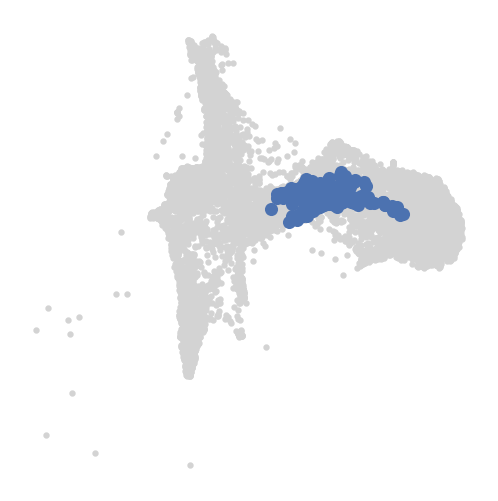

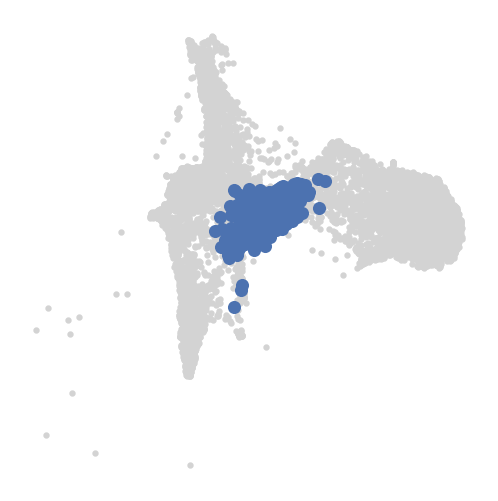

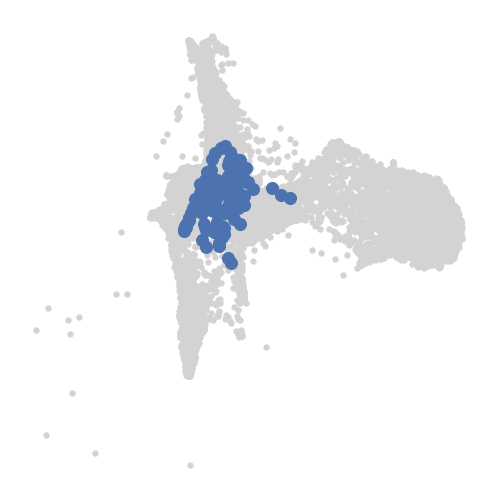

In [187]:
# bin cells based on AT2 transition probability
# visualize on FA2
df_high = filtered_c7_cells_df[filtered_c7_cells_df['AT2 Fate'] > 0.75]
df_mid =  filtered_c7_cells_df[(filtered_c7_cells_df['AT2 Fate'] >= 0.5) & (filtered_c7_cells_df['AT2 Fate'] <= 0.74)]
df_low = filtered_c7_cells_df[filtered_c7_cells_df['AT2 Fate'] <= 0.49]

print(len(df_high.index))
print(len(df_mid.index))
print(len(df_low.index))

palantir.plot.highlight_cells_on_tsne(fa2, list(df_high.index))
palantir.plot.highlight_cells_on_tsne(fa2, list(df_mid.index))
palantir.plot.highlight_cells_on_tsne(fa2, list(df_low.index))

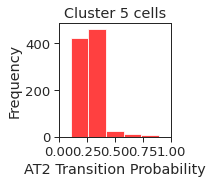

In [48]:
# create a sample dataframe
df = filtered_c5_cells_df

# plot the histogram with different colors for each column
sns.histplot(data=df, x='AT2 Fate', color='red', kde=False, bins=5)

# set the x-axis limits and ticks
plt.xlim([0, 1])
plt.xticks([0, 0.25, 0.5, 0.75, 1])

# set the x-axis label
plt.xlabel('AT2 Transition Probability')

# set the y-axis label
plt.ylabel('Frequency')

# set the title
plt.title('Cluster 5 cells')

# show the plot
plt.show()


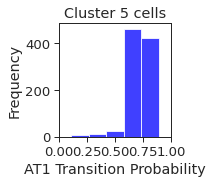

In [49]:
# create a sample dataframe
df = filtered_c5_cells_df

# plot the histogram with different colors for each column
sns.histplot(data=df, x='AT1 Fate', color='blue', kde=False, bins=5)

# set the x-axis limits and ticks
plt.xlim([0, 1])
plt.xticks([0, 0.25, 0.5, 0.75, 1])

# set the x-axis label
plt.xlabel('AT1 Transition Probability')

# set the y-axis label
plt.ylabel('Frequency')

# set the title
plt.title('Cluster 5 cells')

# show the plot
plt.show()


306
538
18


(<Figure size 600x600 with 1 Axes>, <AxesSubplot:>)

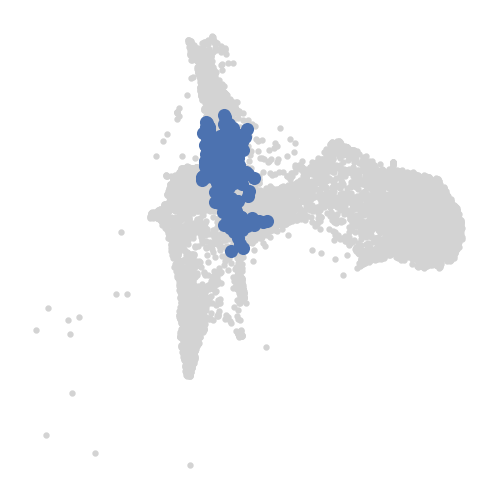

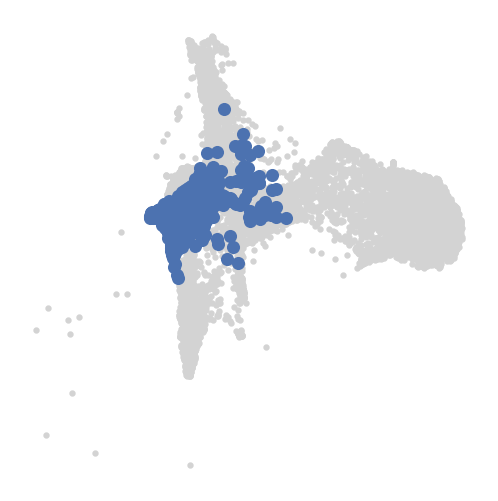

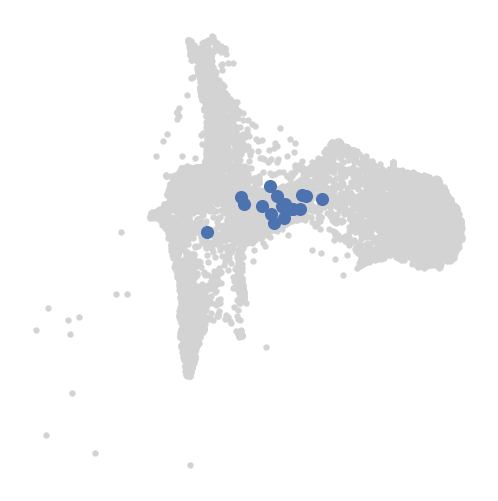

In [196]:
# bin cells based on AT2 transition probability
# visualize on FA2
df_high = filtered_c5_cells_df[filtered_c5_cells_df['AT1 Fate'] >= 0.75]
df_mid =  filtered_c5_cells_df[(filtered_c5_cells_df['AT1 Fate'] >= 0.51) & (filtered_c5_cells_df['AT1 Fate'] <= 0.74)]
df_low = filtered_c5_cells_df[filtered_c5_cells_df['AT1 Fate'] < 0.5]

print(len(df_high.index))
print(len(df_mid.index))
print(len(df_low.index))

palantir.plot.highlight_cells_on_tsne(fa2, list(df_high.index))
palantir.plot.highlight_cells_on_tsne(fa2, list(df_mid.index))
palantir.plot.highlight_cells_on_tsne(fa2, list(df_low.index))

## Repeat calculations for KPY cells

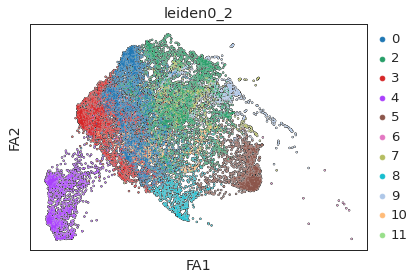

In [24]:
# QC
rcParams['figure.facecolor']='white'
rcParams['figure.figsize']=6,4
sc.pl.draw_graph(KPY_nofresh_scaled, color='leiden0_2', add_outline=True)

In [6]:
import palantir

adata = KPY_nofresh_scaled.copy()

# define scanpy embedding for palantir visualization
fa2 = pd.DataFrame(adata.obsm['X_draw_graph_fa'], index=adata.obs_names)

findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Lato'] not found. Falling back to DejaVu Sans.


findfont: Font family ['Bitstream Vera Sans'] not found. Falling back to DejaVu Sans.


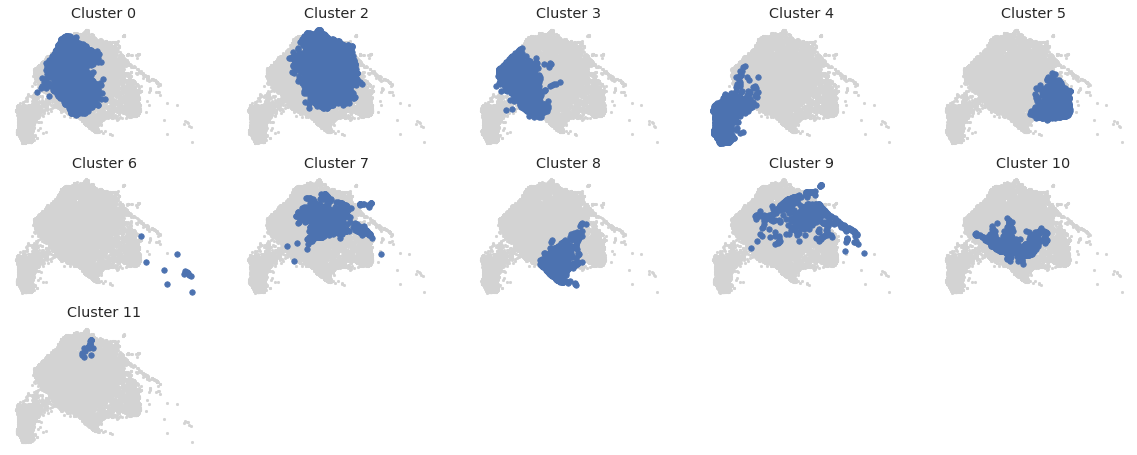

<Figure size 288x288 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 288x288 with 0 Axes>

In [7]:
cluster_labels = sorted(list(set(KPY_nofresh_scaled.obs['leiden0_2'])), key=int)  # all AT2-KPY clusters
num_plots = len(cluster_labels)

# Calculate the number of rows needed
num_rows = num_plots // 5
if num_plots % 5:
    num_rows += 1

# Create subplots
fig, axes = plt.subplots(num_rows, 5, figsize=(20, num_rows * 2.5))  # Adjust the height here
axes = axes.ravel()  # Flatten axes

# Iterate over each cluster label
for i, label in enumerate(cluster_labels):
    # Get all cell indices for the desired cluster
    cells = adata.obs.index[adata.obs["leiden0_2"] == label]

    # QC plot
    palantir.plot.highlight_cells_on_tsne(fa2, cells, ax=axes[i])

    # Set title (header) for the subplot
    axes[i].set_title(f'Cluster {label}')

# Remove empty subplots
if num_plots < len(axes):
    for ax in axes[num_plots:]:
        fig.delaxes(ax)

plt.tight_layout()
plt.show()


start state cell: CACGTGGTCGGAGATG-1-AD06
at2 neg state cell: GTCGAATAGGTAAAGG-1-AD14
at2 pos state cell: AACCTTTTCGTTGTGA-1-AD18


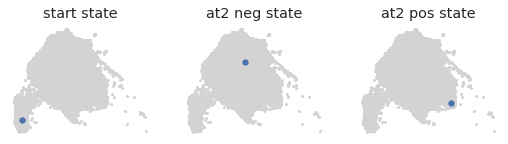

<Figure size 288x288 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 288x288 with 0 Axes>

In [8]:
import matplotlib.pyplot as plt

# Find representative cells for each state
states = {'start state': ('4', 500), 'at2 neg state': ('2', 700), 'at2 pos state': ('5', 100)}
num_plots = len(states)

# Calculate the number of rows needed
num_rows = num_plots // 5
if num_plots % 5:
    num_rows += 1

# subplots
fig, axes = plt.subplots(num_rows, 5, figsize=(15, num_rows * 2))  # Adjust the height here
axes = axes.ravel()  # Flatten axes

for i, (state, (label, idx)) in enumerate(states.items()):
    cell = adata.obs.index[adata.obs["leiden0_2"] == label][idx]
    print(f"{state} cell: {cell}")

    # QC plot
    palantir.plot.highlight_cells_on_tsne(fa2, cell, ax=axes[i])

    # title (header) for the subplot
    axes[i].set_title(state)

# Remove empty subplots
if num_plots < len(axes):
    for ax in axes[num_plots:]:
        fig.delaxes(ax)

plt.tight_layout()
plt.show()

In [9]:
# Step 4: Prepare the data for Palantir
clusters = adata.obs["leiden0_2"]
start_cell = adata.obs.index[adata.obs["leiden0_2"] == "4"][500]
at2neg_state = adata.obs.index[adata.obs["leiden0_2"] == "2"][700]
at2pos_state = adata.obs.index[adata.obs["leiden0_2"] == "5"][100]
print("start state cell:", start_cell)
print("at2 neg state cell:", at2neg_state)
print("at2 pos state cell:", at2pos_state)
terminal_states = pd.Series(['AT2-neg fate', 'AT2-pos fate'], index=[at2neg_state, at2pos_state])

# Extract the expression matrix and convert it to a pandas DataFrame
expr_matrix = pd.DataFrame(adata.X, index=adata.obs.index, columns=adata.var.index)

# Step 5: Run Palantir
# Compute diffusion maps
dm_res = palantir.utils.run_diffusion_maps(expr_matrix, n_components=5)
ms_data = palantir.utils.determine_multiscale_space(dm_res, n_eigs=3) # n_egs MUST be defined

# Run Palantir
pr_res = palantir.core.run_palantir(ms_data, start_cell, num_waypoints=500, knn=50, terminal_states=terminal_states.index)

# Rename the index with the biologically relevant names
pr_res.branch_probs.columns = terminal_states[pr_res.branch_probs.columns]

start state cell: CACGTGGTCGGAGATG-1-AD06
at2 neg state cell: GTCGAATAGGTAAAGG-1-AD14
at2 pos state cell: AACCTTTTCGTTGTGA-1-AD18
Determing nearest neighbor graph...


/home/alm72/.conda/envs/KPYtimecourse/lib/python3.8/site-packages/numba/typed_passes.py:292: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../../../../../home/alm72/.conda/envs/KPYtimecourse/lib/python3.8/site-packages/umap/rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^

  warnings.warn(errors.NumbaPerformanceWarning(msg,
/home/alm72/.conda/envs/KPYtimecourse/lib/python3.8/site-packages/umap/nndescent.py:91: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/

Sampling and flocking waypoints...
Time for determining waypoints: 0.023014354705810546 minutes
Determining pseudotime...
Shortest path distances using 50-nearest neighbor graph...
Time for shortest paths: 0.5030167659123739 minutes
Iteratively refining the pseudotime...
Correlation at iteration 1: 0.9999
Entropy and branch probabilities...
Markov chain construction...
Computing fundamental matrix and absorption probabilities...
Project results to all cells...


In [10]:
# Filter probs in each cluster as a dict for visualization

cluster_labels = sorted(list(set(KPY_nofresh_scaled.obs['leiden0_2'])), key=int) 
filtered_cells_dfs = {}  # this will store your filtered dataframes

# Iterate over each cluster label
for label in cluster_labels:
    # Get all cell indices for the desired cluster
    cells = adata.obs.index[adata.obs["leiden0_2"] == label]

    # Filter pr_res.branch_probs for cells in cluster of interest
    filtered_cells_df = pr_res.branch_probs.loc[pr_res.branch_probs.index.isin(cells)]
    filtered_cells_dfs[label] = filtered_cells_df  # store the dataframe

In [ ]:
# branch point leiden clusters
lst = ['4','3','8','0','2','5']
p3 = ['#ef233c']

for i in lst:
    rcParams["figure.facecolor"]='white'
    rcParams['figure.figsize'] = 2.5,2
    ax = sc.pl.draw_graph(KPY_nofresh_scaled, color='leiden0_2', groups = i, wspace=0.5, add_outline=True, palette=p3, 
    legend_loc=None, show=False)
    plt.title(f'KPY Cluster {i}')

/home/alm72/.conda/envs/KPYtimecourse/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: In a future version of pandas all arguments of Categorical.replace except for the argument 'value' will be keyword-only.
  values = values.replace(values.categories.difference(groups), np.nan)
/home/alm72/.conda/envs/KPYtimecourse/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: Categorical.replace is deprecated and will be removed in a future version. Use Series.replace directly instead.
  values = values.replace(values.categories.difference(groups), np.nan)
/home/alm72/.conda/envs/KPYtimecourse/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: In a future version of pandas all arguments of Categorical.replace except for the argument 'value' will be keyword-only.
  values = values.replace(values.categories.difference(groups), np.nan)
/home/alm72/.conda/envs/KPYtimecourse/lib/python3.8/

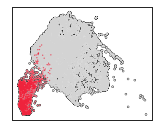

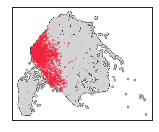

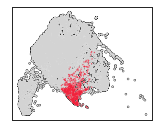

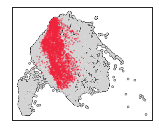

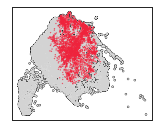

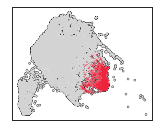

In [14]:
# branch point leiden clusters
lst = ['4','3','8','0','2','5']
p3 = ['#ef233c']

for i in lst:
    rcParams["figure.facecolor"]='white'
    rcParams['figure.figsize'] = 2.5,2
    ax = sc.pl.draw_graph(KPY_nofresh_scaled, color='leiden0_2', groups = i, wspace=0.5, add_outline=True, palette=p3, 
    legend_loc=None, show=False)
    plt.title('')
    plt.xlabel('')
    plt.ylabel('')

Length of dataframe for cluster 4: 1862


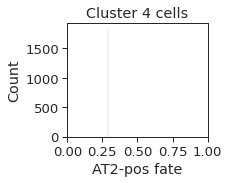

Length of dataframe for cluster 3: 2443


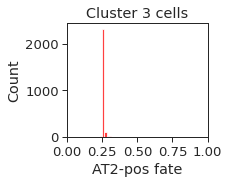

Length of dataframe for cluster 8: 807


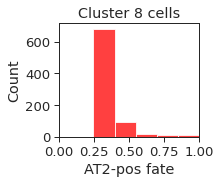

Length of dataframe for cluster 0: 3491


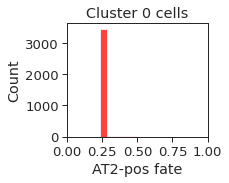

Length of dataframe for cluster 2: 3303


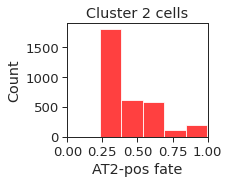

Length of dataframe for cluster 5: 1585


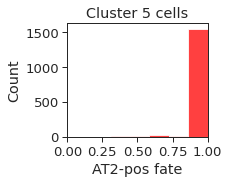

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of numbers to iterate over
nums = [4, 3, 8, 0, 2, 5]

for num in nums:
    # Create a sample dataframe for each number
    df = filtered_cells_dfs[f'{num}']
    print(f'Length of dataframe for cluster {num}:', len(df))

    # Plot the histogram with different colors for each column
    sns.histplot(data=df, x='AT2-pos fate', color='red', bins=5, kde=False)

    # Set the x-axis and y-axis limits and ticks
    plt.xlim([0, 1])
    plt.xticks([0, 0.25, 0.5, 0.75, 1])

    # Set the x-axis and y-axis labels
    #plt.xlabel('AT2-high Transition Probability')
    #plt.ylabel('Frequency')

    # Set the title
    plt.title(f'Cluster {num} cells')

    # Show the plot
    plt.show()


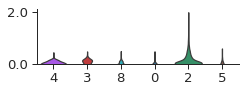

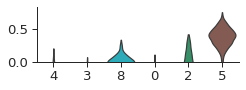

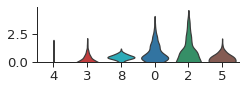

In [27]:
# For figure

order = ['4','3','8','0','2','5']

lst = ['AT1 sig','AT2 sig','Sox9']

for i in lst:
    rcParams['figure.figsize']=4,1
    rcParams['figure.facecolor']='white'
    with axes_style({'axes.grid': False}):
        ax=sc.pl.violin(KPY_nofresh_scaled, i, groupby='leiden0_2', use_raw=False, stripplot=False, jitter=False,
        order=order,show=False) 
        despine(right=True)
        plt.title('')
        plt.ylabel('')
        plt.xlabel('')
        ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
        ax.set_ylim(0)

### Subset middle and late timepoint clusters and see relative differences in gene expression

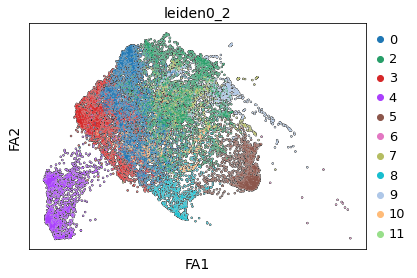

In [9]:
# QC
rcParams['figure.facecolor']='white'
rcParams['figure.figsize']=6,4
sc.pl.draw_graph(KPY_nofresh, color='leiden0_2', add_outline=True)

In [14]:
earlymiddle_subset = KPY_nofresh[KPY_nofresh.obs['leiden0_2'].isin(['4','8','0'])]
middle_subset = KPY_nofresh[KPY_nofresh.obs['leiden0_2'].isin(['8','0'])]
late_subset = KPY_nofresh[KPY_nofresh.obs['leiden0_2'].isin(['2','5'])]

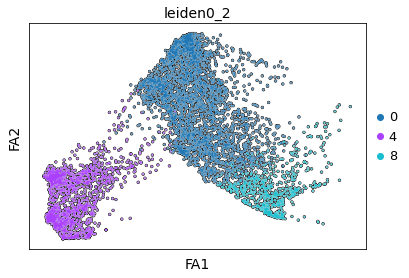

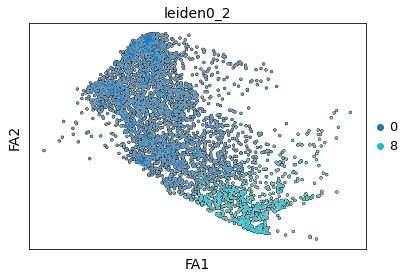

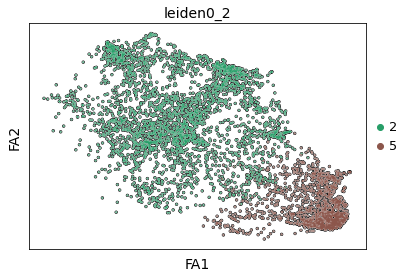

In [15]:
# QC
rcParams['figure.facecolor']='white'
rcParams['figure.figsize']=6,4
sc.pl.draw_graph(earlymiddle_subset, color='leiden0_2', add_outline=True, s=15)
sc.pl.draw_graph(middle_subset, color='leiden0_2', add_outline=True, s=15)
sc.pl.draw_graph(late_subset, color='leiden0_2', add_outline=True, s=15)

In [16]:
# create dict
marker_dict={
    'AT2 signature':['Etv5','Lyz2','Abca3'],
    'Injury/plasticity signature':['Cldn4','Krt8','Nr4a3','Ifngr1','Ndrg1','Sox9','Hmga2','Itga2']        
            }

In [17]:
# QC
print('Number of genes in each signature')
for k,v in marker_dict.items():
    print(f'{k}:', len(v))

# Defined a signature score function

def evaluate_partition(anndata, marker_dict, gene_symbol_key=None, partition_key=None):    
    
    print('Number of cells to calculate scores for:', len(anndata.obs.index))
  
    #Test inputs
    if partition_key not in anndata.obs.columns.values:
        print('KeyError: The partition key was not found in the passed AnnData object.')
        print('   Have you done the clustering? If so, please tell pass the cluster IDs with the AnnData object!')
        raise

    if (gene_symbol_key != None) and (gene_symbol_key not in anndata.var.columns.values):
        print('KeyError: The provided gene symbol key was not found in the passed AnnData object.')
        print('   Check that your cell type markers are given in a format that your anndata object knows!')
        raise
        
    if gene_symbol_key:
        gene_ids = anndata.var[gene_symbol_key]
    else:
        gene_ids = anndata.var_names
           
    # I created a column based on index. This allows z-score calculation on single cells rather than clusters
    clusters = np.unique(anndata.obs[partition_key])
    n_clust = len(clusters)
    n_groups = len(marker_dict)
    
    marker_res = np.zeros((n_groups, n_clust))
    z_scores = sc.pp.scale(anndata, copy=True)

    i = 0
    for group in marker_dict:
        start = time.time()
        print(f'Calculating score for {group}')
        # Find the corresponding columns and get their mean expression in the cluster
        j = 0
        for clust in clusters:
            cluster_cells = np.in1d(z_scores.obs[partition_key], clust)
            marker_genes = np.in1d(gene_ids, marker_dict[group])
            marker_res[i,j] = z_scores.X[np.ix_(cluster_cells,marker_genes)].mean()
            j += 1
        i+=1
        end = time.time()
        print(f'Time to calculate signature score for {group} (min):', (end - start)/60)
    
    variances = np.nanvar(marker_res, axis=0)
    if np.all(np.isnan(variances)):
        print("No variances could be computed, check if your cell markers are in the data set.")
        print("Maybe the cell marker IDs do not correspond to your gene_symbol_key input or the var_names")
        raise
    
    print('Creating dataframe with signature results')
    
    marker_res_df = pd.DataFrame(marker_res, columns=clusters, index=marker_dict.keys())
    
    return marker_res_df


Number of genes in each signature
AT2 signature: 3
Injury/plasticity signature: 8


In [18]:
# Calculate the z-score
import time

# populations to calculate scores
pops = [earlymiddle_subset, middle_subset, late_subset]

for pop in pops:
    start = time.time()
    
    df = evaluate_partition(pop, marker_dict, gene_symbol_key=None, partition_key = 'cell_barcodes')
    
    # Transpose the dataframe
    df_transposed = df.transpose()
    
    print('Adding signature to adata.obs')
    for i in df_transposed.columns:
        pop.obs[f'{i}'] = df_transposed[f'{i}']
        
    end = time.time()
    print(f'Done. Total time to calculate signature scores of {len(df_transposed.columns)} clusters (min):', (end - start)/60)


Number of cells to calculate scores for: 6160
Calculating score for AT2 signature
Time to calculate signature score for AT2 signature (min): 0.10644856691360474
Calculating score for Injury/plasticity signature
Time to calculate signature score for Injury/plasticity signature (min): 0.25744622151056923
Creating dataframe with signature results
Adding signature to adata.obs


<ipython-input-18-459792d0392d>:17: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  pop.obs[f'{i}'] = df_transposed[f'{i}']


Done. Total time to calculate signature scores of 2 clusters (min): 0.42740328709284464
Number of cells to calculate scores for: 4298
Calculating score for AT2 signature
Time to calculate signature score for AT2 signature (min): 0.07220594882965088
Calculating score for Injury/plasticity signature
Time to calculate signature score for Injury/plasticity signature (min): 0.1748779575030009
Creating dataframe with signature results
Adding signature to adata.obs


<ipython-input-18-459792d0392d>:17: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  pop.obs[f'{i}'] = df_transposed[f'{i}']


Done. Total time to calculate signature scores of 2 clusters (min): 0.28781381448109944
Number of cells to calculate scores for: 4888
Calculating score for AT2 signature
Time to calculate signature score for AT2 signature (min): 0.0861129641532898
Calculating score for Injury/plasticity signature
Time to calculate signature score for Injury/plasticity signature (min): 0.21083991924921672
Creating dataframe with signature results
Adding signature to adata.obs


<ipython-input-18-459792d0392d>:17: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  pop.obs[f'{i}'] = df_transposed[f'{i}']


Done. Total time to calculate signature scores of 2 clusters (min): 0.35153969526290896


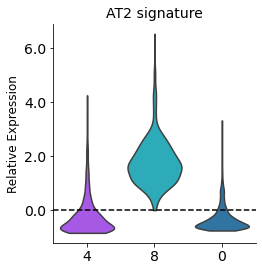

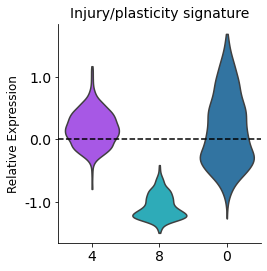

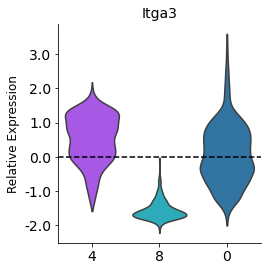

In [19]:
# Plot

order = ['4','8','0']

lst = ['AT2 signature','Injury/plasticity signature','Itga3']

scaled = sc.pp.scale(earlymiddle_subset, copy=True)

for i in lst:
    rcParams['figure.figsize']=4,4
    rcParams['figure.facecolor']='white'
    with axes_style({'axes.grid': False}):
        ax=sc.pl.violin(scaled, i, groupby='leiden0_2', use_raw=False, stripplot=False, jitter=False,
        order=order,show=False) 
        despine(right=True)
        plt.title(i)
        plt.ylabel('Relative Expression', fontsize=12)
        plt.xlabel('')
        plt.axhline(0, linestyle='--', color='black')
        ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
        #ax.set_ylim(-2,2)

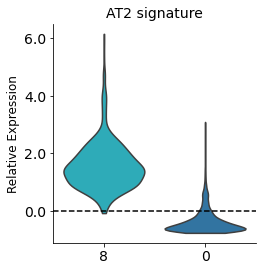

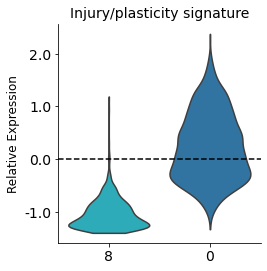

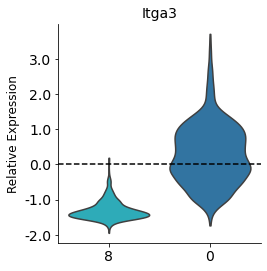

In [22]:
# Plot

order = ['8','0']

lst = ['AT2 signature','Injury/plasticity signature','Itga3']

scaled = sc.pp.scale(middle_subset, copy=True)

for i in lst:
    rcParams['figure.figsize']=4,4
    rcParams['figure.facecolor']='white'
    with axes_style({'axes.grid': False}):
        ax=sc.pl.violin(scaled, i, groupby='leiden0_2', use_raw=False, stripplot=False, jitter=False,
        order=order,show=False) 
        despine(right=True)
        plt.title(i)
        plt.ylabel('Relative Expression', fontsize=12)
        plt.xlabel('')
        plt.axhline(0, linestyle='--', color='black')
        ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
        #ax.set_ylim(-2,2)

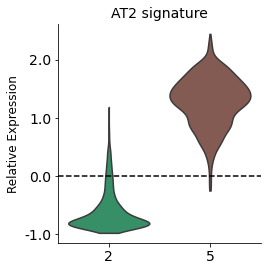

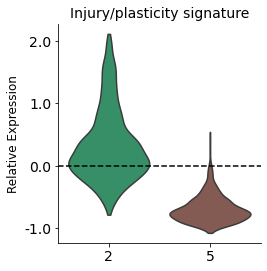

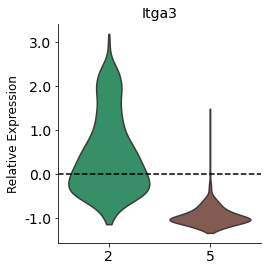

In [23]:
# Plot

order = ['2','5']

lst = ['AT2 signature','Injury/plasticity signature','Itga3']

scaled = sc.pp.scale(late_subset, copy=True)

for i in lst:
    rcParams['figure.figsize']=4,4
    rcParams['figure.facecolor']='white'
    with axes_style({'axes.grid': False}):
        ax=sc.pl.violin(scaled, i, groupby='leiden0_2', use_raw=False, stripplot=False, jitter=False,
        order=order,show=False) 
        despine(right=True)
        plt.title(i)
        plt.ylabel('Relative Expression', fontsize=12)
        plt.xlabel('')
        plt.axhline(0, linestyle='--', color='black')
        ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
        #ax.set_ylim(-2,2)

### Create a barplot for AT2-KRAS data

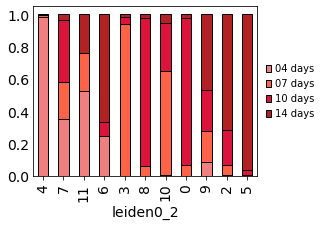

In [4]:
# For figure

# extract obs dataframe
df = KPY_nofresh.obs.copy()
df_plot = df.groupby(['leiden0_2', 'time point']).size().reset_index().pivot(columns='time point', index='leiden0_2', values=0)

# calculate proportions
df_plot['14 days_prop'] = df_plot['14 days'] / df_plot.sum(axis=1)
df_plot['04 days_prop'] = df_plot['04 days'] / df_plot.sum(axis=1)

# sort by proportions
df_plot['composition_ratio'] = df_plot['14 days_prop'] / df_plot['04 days_prop']
df_plot = df_plot.sort_values(by='composition_ratio')

# drop proportion and composition ratio columns
df_plot = df_plot.drop(columns=['14 days_prop', '04 days_prop', 'composition_ratio'])

order = ['04 days', '07 days', '10 days', '14 days']
df_plot = df_plot[order]

df_plot = df_plot.reindex(['4', '7', '11', '6', '3', '8', '10', '0','9', '2', '5']) # minor edit. Wanted 9 after 10

# normalize rows
# Credit: https://stackoverflow.com/questions/26537878/pandas-sum-across-columns-and-divide-each-cell-from-that-value
df3 = df_plot.div(df_plot.sum(axis=1), axis=0)

#color = ['#8ecae6', '#e4c1f9', '#ffd166', '#ff4d6d']
color = ['lightcoral','tomato', 'crimson','firebrick']
                
rcParams['figure.figsize'] = 4, 3
with axes_style({'axes.grid': False}):
    ax = df3.plot(kind='bar', stacked=True, edgecolor='black', color=color)
    ax.legend(loc='center left', bbox_to_anchor=(1., 0.5), ncol=1, frameon=False, title='', title_fontsize=10, fontsize=10)
    ax.tick_params(axis=u'y', which=u'both', length=0)
    plt.show()

### Injury genes in AT2-KRAS cells

In [4]:
injury_genes = ['Abca3','Sftpb','Etv5','Cldn4', 'Krt8', 'Ndrg1', 'Sprr1a', 'Trp53', 'Mdm2', 'Ccnd1', 'Gdf15', 'Ifngr1', 'Ly6a', 'Irf7', 'Cxcl16', 'Nr4a3', 'Tmem173', 'Orm1', 'Cbr4','Hopx','Igfbp2']

lst = [('injury_genes', injury_genes)]

for name, genes in lst:
    not_in_adata = [x for x in genes if x not in list(KPY_nofresh.var.index)]

# Scale and create dataframe
print('Scaling and copying expression matrix')

scaled = sc.pp.scale(KPY_nofresh, copy=True)
clusters = ['4', '7', '11', '6', '3', '8', '10', '0','9', '2', '5']
time_points = ['04 days', '07 days', '10 days', '14 days']
scaled = scaled[scaled.obs['leiden0_2'].isin(clusters)]
scaled = scaled[scaled.obs['time point'].isin(time_points)]

input_df = pd.DataFrame(data=scaled.X, index=scaled.obs_names, columns=scaled.var_names)

df = input_df.copy()

# QC
if len(df.columns) == len(scaled.var_names):
    print('QC: PASS - assembled df has a gene length equal to the original anndata')
else:
    print('QC: FAIL - assembled df gene length IS NOT EQUAL to the original anndata')


# Add pathways 
pathways=['leiden0_2','time point'] 

genes = ['Abca3','Sftpb','Etv5','Cldn4', 'Krt8', 'Ndrg1', 'Sprr1a', 'Trp53', 'Mdm2', 'Ccnd1', 'Gdf15', 'Ifngr1', 'Ly6a', 'Irf7', 'Cxcl16', 'Nr4a3', 'Tmem173', 'Orm1', 'Cbr4','Hopx','Igfbp2']

paths_of_interest = [] # If pathway isn't here IT WILL BE REMOVED

for path in pathways:
    df[path]=scaled.obs[path]

# Manually order the dataframe using a numeric strategy
input2 = df['leiden0_2'].astype('object')

sorterIndex = {'4': '0', 
               '7': '1', 
               '11': '2', 
               '6': '3', 
               '3': '4', 
               '8': '5', 
               '10': '6', 
               '0': '7', 
               '9': '8', 
               '2': '9', 
               '5': '99'}


results = input2.map(sorterIndex)
df['order_results'] = results # creates row with numeric values that can be sorted
df = df.sort_values(['order_results'], ascending = True) # reorder the dataframe

# Color annotations
# time point colors
color_input = df['time point'].astype('object')

lut = {'04 days': 'lightcoral', '07 days': 'tomato', '10 days': 'crimson', '14 days': 'firebrick'}

col_colors = color_input.map(lut)

# cluster colors
color_input2 = df['leiden0_2'].astype('object')

lut2 = {'0': '#1f77b4', '2': '#279e68', '3': '#d62728', '4': '#aa40fc', '5': '#8c564b', '6': '#e377c2', '7': '#b5bd61', '8': '#17becf', '9': '#aec7e8', '10': '#ffbb78', '11': '#98df8a'}

col_colors2 = color_input2.map(lut2)

# Remove columns that are not gene expression
df_input = df.drop(['leiden0_2','time point'], axis=1)
df_input = df_input.T # makes cells columns

print('Selecting genes and pathways of interest')
inpt = genes + paths_of_interest
df1 = df_input.loc[inpt] 
print('# Genes and pathways used:', len(df1.index))
df1 = df1.fillna(0) # turn NaN into 0 since there is no gene expression

# QC
# Check for non-numeric data
non_numeric = df1.applymap(lambda x: not isinstance(x, (int, float)))
if non_numeric.sum().sum() > 0:
    print("FAIL: Non-numeric data found in the dataframe.")
else:
    print("PASS: No non-numeric data found in the dataframe.")

Scaling and copying expression matrix
QC: PASS - assembled df has a gene length equal to the original anndata
Selecting genes and pathways of interest
# Genes and pathways used: 21
PASS: No non-numeric data found in the dataframe.


### Plot AT2 and injury signature genes

Scaling and copying expression matrix
QC: PASS - assembled df has a gene length equal to the original anndata
Selecting genes and pathways of interest
# Genes and pathways used: 17
PASS: No non-numeric data found in the dataframe.


<Figure size 1800x1200 with 0 Axes>

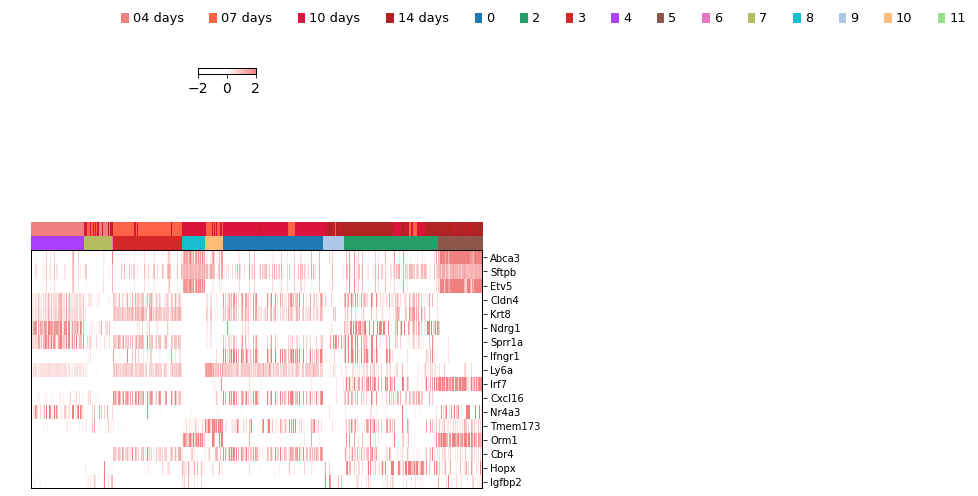

In [5]:
# Scale and create dataframe
print('Scaling and copying expression matrix')

scaled = sc.pp.scale(KPY_nofresh, copy=True)
clusters = ['4', '7', '11', '6', '3', '8', '10', '0','9', '2', '5']
time_points = ['04 days', '07 days', '10 days', '14 days']
scaled = scaled[scaled.obs['leiden0_2'].isin(clusters)]
scaled = scaled[scaled.obs['time point'].isin(time_points)]

input_df = pd.DataFrame(data=scaled.X, index=scaled.obs_names, columns=scaled.var_names)

df = input_df.copy()

# QC
if len(df.columns) == len(scaled.var_names):
    print('QC: PASS - assembled df has a gene length equal to the original anndata')
else:
    print('QC: FAIL - assembled df gene length IS NOT EQUAL to the original anndata')


# Add pathways 
pathways=['leiden0_2','time point'] 

genes = ['Abca3','Sftpb','Etv5','Cldn4', 'Krt8', 'Ndrg1', 'Sprr1a', 'Ifngr1', 'Ly6a', 'Irf7', 'Cxcl16', 'Nr4a3', 'Tmem173', 'Orm1', 'Cbr4','Hopx','Igfbp2']

paths_of_interest = [] # If pathway isn't here IT WILL BE REMOVED

for path in pathways:
    df[path]=scaled.obs[path]

# manually order the dataframe using a numeric strategy
input2 = df['leiden0_2'].astype('object')

sorterIndex = {'4': '0', 
               '7': '1', 
               '11': '2', 
               '6': '3', 
               '3': '4', 
               '8': '5', 
               '10': '6', 
               '0': '7', 
               '9': '8', 
               '2': '9', 
               '5': '99'}


results = input2.map(sorterIndex)
df['order_results'] = results # creates row with numeric values that can be sorted
df = df.sort_values(['order_results'], ascending = True) # reorder the dataframe

# Color annotations
# time point colors
color_input = df['time point'].astype('object')

lut = {'04 days': 'lightcoral', '07 days': 'tomato', '10 days': 'crimson', '14 days': 'firebrick'}

col_colors = color_input.map(lut)

# cluster colors
color_input2 = df['leiden0_2'].astype('object')

lut2 = {'0': '#1f77b4', '2': '#279e68', '3': '#d62728', '4': '#aa40fc', '5': '#8c564b', '6': '#e377c2', '7': '#b5bd61', '8': '#17becf', '9': '#aec7e8', '10': '#ffbb78', '11': '#98df8a'}

col_colors2 = color_input2.map(lut2)

# Remove columns that are not gene expression
df_input = df.drop(['leiden0_2','time point'], axis=1)
df_input = df_input.T # makes cells columns

print('Selecting genes and pathways of interest')
inpt = genes + paths_of_interest
df1 = df_input.loc[inpt] 
print('# Genes and pathways used:', len(df1.index))
df1 = df1.fillna(0) # turn NaN into 0 since there is no gene expression

# QC
# Check for non-numeric data
non_numeric = df1.applymap(lambda x: not isinstance(x, (int, float)))
if non_numeric.sum().sum() > 0:
    print("FAIL: Non-numeric data found in the dataframe.")
else:
    print("PASS: No non-numeric data found in the dataframe.")
    
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sb
import matplotlib.patches as mpatches

# Plot clustermap

vmin = -2  # expression
vmax = 2  # expression
base = 4 # for plot size, not expression

cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['white', 'white', 'lightcoral'])

plt.figure(dpi=300)

g1 = sb.clustermap(
    df1, vmin=vmin, vmax=vmax, center=0,
    cmap=cmap, metric="euclidean", row_cluster=False, col_cluster=False,
    figsize=(8, len(df1.index) / base), cbar_pos=(0.35, 1.4, .1, .02),  # locxaxis,locyaxis,cbarwidth,cbarheight
    col_colors=[col_colors, col_colors2], yticklabels=True, xticklabels=False,
    cbar_kws={"orientation": "horizontal"},
    dendrogram_ratio=0.05, colors_ratio=0.05
)

ax = g1.ax_heatmap
ax.set_xticklabels([])
ax.set_xticks([])
ax.set_xlabel("")
ax.set_ylabel("", rotation=270, labelpad=25)
ax.tick_params(axis='y', which='major', labelsize=10)
ax.axhline(y=0, color='black', linewidth=2)  # border
ax.axhline(y=len(df1.index), color='black', linewidth=2)  # border
ax.axvline(x=0, color='black', linewidth=2)  # border
ax.axvline(x=len(df1.columns), color='black', linewidth=2)  # border

# Create a list to collect the patches
patches = []

# Create a patch for every color
for key in lut.keys():
    patches.append(mpatches.Patch(color=lut[key], label=key))

# Add patches for col_colors2
for key in lut2.keys():
    patches.append(mpatches.Patch(color=lut2[key], label=key))

# Add legends for col_colors and col_colors2
plt.legend(handles=patches, bbox_to_anchor=(1, 1, 10, 10), loc='upper center', ncol=len(patches), borderaxespad=0, frameon=False)

# Get the colorbar axes
cbar_ax = g1.cax

# Add a border around the colorbar
cbar_ax.spines['top'].set_visible(True)
cbar_ax.spines['bottom'].set_visible(True)
cbar_ax.spines['left'].set_visible(True)
cbar_ax.spines['right'].set_visible(True)
cbar_ax.spines['top'].set_linewidth(1)
cbar_ax.spines['bottom'].set_linewidth(1)
cbar_ax.spines['left'].set_linewidth(1)
cbar_ax.spines['right'].set_linewidth(1)

plt.show()

### AT2 and injury signatures in AT2 WT organoids

Scaling and copying expression matrix
True
Selecting genes and pathways of interest
# Genes and pathways used: 17
PASS: No non-numeric data found in the dataframe.


<Figure size 1800x1200 with 0 Axes>

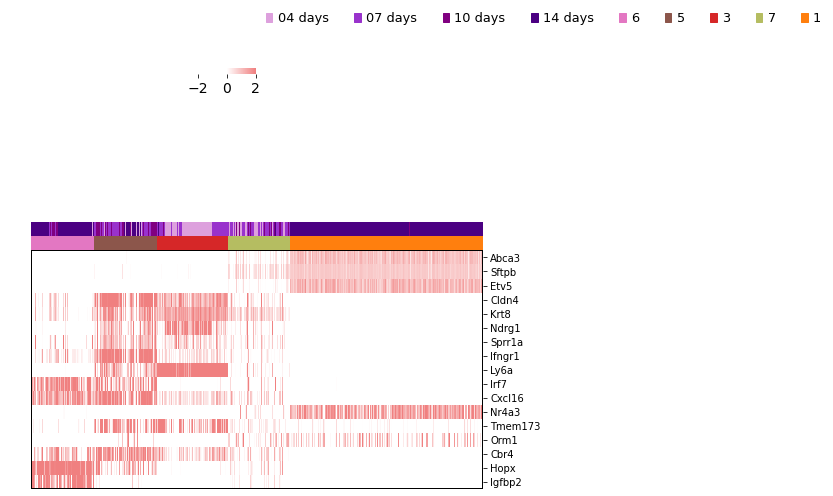

In [4]:
# Remove fresh AT2 cells from subset data
Y_nofresh = Ycontrol2[Ycontrol2.obs['time point'].isin(['04 days','07 days', '10 days','14 days'])]

# Scale and create dataframe
print('Scaling and copying expression matrix')

scaled = sc.pp.scale(Y_nofresh, copy=True)
clusters = ['6', '5', '3', '7', '1']
time_points = ['04 days','07 days','10 days','14 days']
scaled = scaled[scaled.obs['leiden0_4'].isin(clusters)]
scaled = scaled[scaled.obs['time point'].isin(time_points)]

input_df = pd.DataFrame(data=scaled.X, index=scaled.obs_names, columns=scaled.var_names)

#df = input_df[marker_dict['PID_EPHA2_FWD_PATHWAY'] + marker_dict['KRAS_LUNG_UP_V1_UP']]
df = input_df.copy()

# QC
print(len(df.columns) == len(scaled.var_names))

# Add pathways 
pathways=['leiden0_4','time point'] 

genes = ['Abca3','Sftpb','Etv5','Cldn4', 'Krt8', 'Ndrg1', 'Sprr1a', 'Ifngr1', 'Ly6a', 'Irf7', 'Cxcl16', 'Nr4a3', 'Tmem173', 'Orm1', 'Cbr4','Hopx','Igfbp2']

paths_of_interest = [] # If pathway isn't here IT WILL BE REMOVED

for path in pathways:
    df[path]=scaled.obs[path]

# manually order the dataframe using a numeric strategy
input2 = df['leiden0_4'].astype('object')
sorterIndex = {'6':'0',
               '5':'1',
               '3':'2',
               '7':'3',
               '1':'4',
              }

results = input2.map(sorterIndex)
df['order_results'] = results # creates row with numeric values that can be sorted
df = df.sort_values(['order_results'], ascending = True) # reorder the dataframe

# Color annotations
# time point colors
color_input = df['time point'].astype('object')

lut = {'04 days':'plum','07 days':'darkorchid','10 days':'purple','14 days':'indigo'}

col_colors = color_input.map(lut)

# cluster colors
color_input2 = df['leiden0_4'].astype('object')
lut2 = {
 '6': '#e377c2',
 '5': '#8c564b',
 '3': '#d62728',
 '7': '#b5bd61',
 '1': '#ff7f0e',
}

col_colors2 = color_input2.map(lut2)

# Remove columns that are not gene expression
df_input = df.drop(['leiden0_4','time point'], axis=1)
df_input = df_input.T # makes cells columns

print('Selecting genes and pathways of interest')
inpt = genes + paths_of_interest
df1 = df_input.loc[inpt] 
print('# Genes and pathways used:', len(df1.index))
df1 = df1.fillna(0) # turn NaN into 0 since there is no gene expression

# QC
# Check for non-numeric data
non_numeric = df1.applymap(lambda x: not isinstance(x, (int, float)))
if non_numeric.sum().sum() > 0:
    print("FAIL: Non-numeric data found in the dataframe.")
else:
    print("PASS: No non-numeric data found in the dataframe.")

# Plot clustermap

vmin = -2 # expression
vmax = 2 # expression
base = 4 # for plot size, not expression

cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['white', 'white', 'lightcoral'])

plt.figure(dpi=300)

g1 = sb.clustermap(
df1, vmin=vmin, vmax=vmax, #center=center, 
cmap=cmap, metric="euclidean", row_cluster=False, col_cluster=False,
figsize=(8,len(df1.index)/base), cbar_pos=(0.35, 1.4, .1, .02), # locxaxis,locyaxis,cbarwidth,cbarheight
col_colors=[col_colors,col_colors2], yticklabels=True, xticklabels=False, cbar_kws={"orientation": "horizontal"},
dendrogram_ratio=0.05, colors_ratio=0.05
                   ) 
ax = g1.ax_heatmap
ax.set_xticklabels([])
ax.set_xticks([])
ax.set_xlabel("")
ax.set_ylabel("", rotation=270, labelpad=25)
ax.tick_params(axis='y', which='major', labelsize=10)
ax.axhline(y=0, color='black',linewidth=2) # border
ax.axhline(y=len(df1.index), color='black',linewidth=2) # border
ax.axvline(x=0, color='black',linewidth=2) # border
#ax.axvline(x=4490, color='black',linewidth=2, linestyle='--') #fresh/org line
#ax.axvline(x=4490+9531, color='black',linewidth=2, linestyle='--') # control line
ax.axvline(x=len(df1.columns), color='black',linewidth=2) # border

import matplotlib.patches as mpatches

# create a list to collect the patches
patches = []

# create a patch for every color 
for key in lut.keys():
    patches.append(mpatches.Patch(color=lut[key], label=key))

# add patches for col_colors2
for key in lut2.keys():
    patches.append(mpatches.Patch(color=lut2[key], label=key))

# Add legends for col_colors and col_colors2
plt.legend(handles=patches, bbox_to_anchor=(1, 1, 10, 10), loc='upper center', ncol=len(patches), borderaxespad=0, frameon=False)

plt.show()

### Look for expression of Itga3 ligands
* Curated from PMID:29346760 and CellPhoneDB database

In [2]:
# load mesenchymal cell data
mes_results_file = '/n/data2/bch/hemonc/ckim/AARON/20190715_KPY_timecourse/data_analysis/saved_files/adata_stromal.h5ad'
mes = sc.read(mes_results_file)

/home/alm72/.conda/envs/KPYtimecourse/lib/python3.8/site-packages/anndata/compat/__init__.py:232: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(
/home/alm72/.conda/envs/KPYtimecourse/lib/python3.8/site-packages/anndata/compat/__init__.py:232: FutureWarning: Moving element from .uns['neighbors']['connectivities'] to .obsp['connectivities'].

This is where adjacency matrices should go now.
  warn(


[<AxesSubplot:title={'center':'leiden0_4'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <AxesSubplot:title={'center':'yfp_time_annot'}, xlabel='UMAP1', ylabel='UMAP2'>]

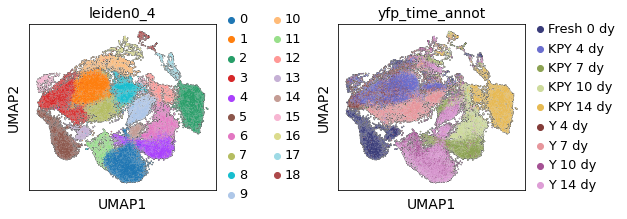

In [4]:
rcParams['figure.figsize']=3,3
rcParams['figure.facecolor']='white'
sc.pl.umap(mes, color=['leiden0_4','yfp_time_annot'], show=False, frameon=True, add_outline=True, wspace=0.5)

### Remove fresh mesenchyme

In [22]:
# Scale and create dataframe
print('Scaling and copying expression matrix')

scaled = sc.pp.scale(mes, copy=True)
clusters = ['5', '13', '3', '1', '15', '8', '7', '10','16','11','9','0','14','4','6','18','12','17','2']
time_points = ['KPY 4 dy','KPY 7 dy','KPY 10 dy','KPY 14 dy','Y 4 dy','Y 7 dy','Y 10 dy','Y 14 dy']
scaled = scaled[scaled.obs['leiden0_4'].isin(clusters)]
scaled = scaled[scaled.obs['yfp_time_annot'].isin(time_points)]

input_df = pd.DataFrame(data=scaled.X, index=scaled.obs_names, columns=scaled.var_names)

df = input_df.copy()

# QC
if len(df.columns) == len(scaled.var_names):
    print('QC: PASS - assembled df has a gene length equal to the original anndata')
else:
    print('QC: FAIL - assembled df gene length IS NOT EQUAL to the original anndata')


# Add pathways 
print('Adding pathway and genes')

pathways=['leiden0_4','yfp_time_annot'] 

# Filter genes of interest not in adata.var_names
goi = ['Cspg4', 'Calr', 'Fn1', 'Finc', 'Lama3', 'Tsp1', 'Adam9', 'Lama1', 'Lama2', 'Lama4', 'Lama5', 'Lamb1', 'Lamb3', 'Lamc1', 'Lamc2', 'Lamc3', 'Nid1', 'Plau', 'Reln', 'Timp2', 'Vtn']

missing  = [x for x in goi if x not in list(mes.var_names)]
genes = [x for x in goi if x in list(mes.var_names)]
print('Genes not found in var_names:', missing)
len(goi) == len(missing) + len(genes) # QC

paths_of_interest = [] # If pathway isn't here IT WILL BE REMOVED

for path in pathways:
    df[path]=scaled.obs[path]

# manually order the dataframe using a numeric strategy
input2 = df['leiden0_4'].astype('object')
sorterIndex = {'5': '0',
               '13': '1',
               '3': '2',
               '1': '3',
               '15': '4',
               '8': '5',
               '7': '6',
               '10': '7',
               '16': '8',
               '11': '9',
               '9': '90',
               '0': '91',
               '14': '92',
               '4': '93',
               '6': '94',
               '18': '95',
               '12': '96',
               '17': '97',
               '2': '98'
              }

results = input2.map(sorterIndex)
df['order_results'] = results # creates row with numeric values that can be sorted
df = df.sort_values(['order_results'], ascending = True) # reorder the dataframe

# Color annotations
print('Adding color map')

# time point colors
color_input = df['yfp_time_annot'].astype('object')

lut = {'Fresh 0 dy': 'slategrey',
       'KPY 4 dy': 'lightsteelblue',
       'KPY 7 dy': 'cornflowerblue',
       'KPY 10 dy': 'dodgerblue',
       'KPY 14 dy': 'royalblue',
       'Y 4 dy': '#c5f0d2',
       'Y 7 dy': '#82d19b',
       'Y 10 dy': '#22ab4e',
       'Y 14 dy': '#067529'}

col_colors = color_input.map(lut)

# cluster colors
color_input2 = df['leiden0_4'].astype('object')
lut2 = {'0': '#1f77b4',
       '1': '#ff7f0e',
       '2': '#279e68',
       '3': '#d62728',
       '4': '#aa40fc',
       '5': '#8c564b',
       '6': '#e377c2',
       '7': '#b5bd61',
       '8': '#17becf',
       '9': '#aec7e8',
       '10': '#ffbb78',
       '11': '#98df8a',
       '12': '#ff9896',
       '13': '#c5b0d5',
       '14': '#c49c94',
       '15': '#f7b6d2',
       '16': '#dbdb8d',
       '17': '#9edae5',
       '18': '#ad494a'}

col_colors2 = color_input2.map(lut2)

# Remove columns that are not gene expression
df_input = df.drop(['leiden0_4','yfp_time_annot'], axis=1)
df_input = df_input.T # makes cells columns

print('Selecting genes and pathways of interest')
inpt = genes + paths_of_interest
df1 = df_input.loc[inpt] 
print('# Genes and pathways used:', len(df1.index))
df1 = df1.fillna(0) # turn NaN into 0 since there is no gene expression

# QC
# Check for non-numeric data
non_numeric = df1.applymap(lambda x: not isinstance(x, (int, float)))
if non_numeric.sum().sum() > 0:
    print("FAIL: Non-numeric data found in the dataframe.")
else:
    print("PASS: No non-numeric data found in the dataframe.")


Scaling and copying expression matrix
QC: PASS - assembled df has a gene length equal to the original anndata
Adding pathway and genes
Genes not found in var_names: ['Finc', 'Tsp1', 'Vtn']
Adding color map
Selecting genes and pathways of interest
# Genes and pathways used: 18
PASS: No non-numeric data found in the dataframe.


<Figure size 900x900 with 0 Axes>

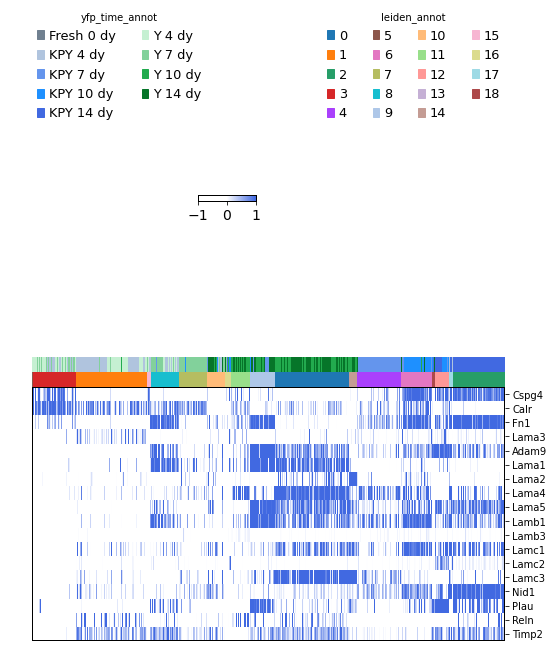

In [24]:
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sb
import matplotlib.patches as mpatches

# Plot clustermap
vmin = -1  # expression
vmax = 1  # expression
base = 4  # for plot size, not expression

#cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['white','white', 'white','white', 'white', '#E2F4FE', '#BEE7FB','#97DBFB','#67CDF9','#58C0F9'])
#cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['white','white', 'white','white', 'white', '#F9DDDD','#F5C2C0','#F1A3A0','#EE837F','#EC625B'])
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['white','white', 'royalblue'])
#cmap = 'RdBu_r'

plt.figure(dpi=300)

g1 = sb.clustermap(
    df1, vmin=vmin, vmax=vmax, center=0,
    cmap=cmap, metric="euclidean", row_cluster=False, col_cluster=False,
    figsize=(8, len(df1.index) / base), cbar_pos=(0.35, 1.4, .1, .02),  # locxaxis,locyaxis,cbarwidth,cbarheight
    col_colors=[col_colors, col_colors2], yticklabels=True, xticklabels=False,
    cbar_kws={"orientation": "horizontal"},
    dendrogram_ratio=0.05, colors_ratio=0.05
)

ax = g1.ax_heatmap
ax.set_xticklabels([])
ax.set_xticks([])
ax.set_xlabel("")
ax.set_ylabel("", rotation=270, labelpad=25)
ax.tick_params(axis='y', which='major', labelsize=10)
ax.axhline(y=0, color='black', linewidth=2)  # border
ax.axhline(y=len(df1.index), color='black', linewidth=2)  # border
ax.axvline(x=0, color='black', linewidth=2)  # border
ax.axvline(x=len(df1.columns), color='black', linewidth=2)  # border

# Create a list to collect the patches for yfp_time_annot legend
yfp_patches = []
for key in lut.keys():
    yfp_patches.append(mpatches.Patch(color=lut[key], label=key))

# Create a list to collect the patches for leiden legend
leiden_patches = []
for key in lut2.keys():
    leiden_patches.append(mpatches.Patch(color=lut2[key], label=key))

# Plot yfp_time_annot legend on the heatmap axes
yfp_legend = ax.legend(handles=yfp_patches, bbox_to_anchor=(0, 2.5), loc='upper left', ncol=2, borderaxespad=0, frameon=False, title="yfp_time_annot")
# Add the leiden_legend explicitly to the current Axes.
ax.add_artist(yfp_legend)

# Plot leiden legend on the heatmap axes
leiden_legend = ax.legend(handles=leiden_patches, bbox_to_anchor=(1, 2.5), loc='upper right', ncol=4, borderaxespad=0, frameon=False, title="leiden_annot")

# Get the colorbar axes
cbar_ax = g1.cax

# Add a border around the colorbar
cbar_ax.spines['top'].set_visible(True)
cbar_ax.spines['bottom'].set_visible(True)
cbar_ax.spines['left'].set_visible(True)
cbar_ax.spines['right'].set_visible(True)
cbar_ax.spines['top'].set_linewidth(1)
cbar_ax.spines['bottom'].set_linewidth(1)
cbar_ax.spines['left'].set_linewidth(1)
cbar_ax.spines['right'].set_linewidth(1)

plt.show()